In [431]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import yaml

from salishsea_tools import viz_tools, geo_tools

In [43]:
bathyfile = '../../../grid/sss150/bathymetry_sss150_update202108210102AUM1.nc'
coords = '../../../grid/sss150/coordinates_sss150_20210709.nc'
meshfile = '../../../grid/mesh_mask202108.nc'   # warning: old mesh file!!!

In [45]:
bathy = xr.open_dataset(bathyfile)
mesh = xr.open_dataset(meshfile)
coord = xr.open_dataset(coords)
tmask = 1 - mesh.tmask[0, 0]
bmask = bathy.Bathymetry == 0  # new tmask
nav_lon = mesh.nav_lon[:]
nav_lat = mesh.nav_lat[:]
nnav_lon = coord.nav_lon[:]
nnav_lat = coord.nav_lat[:]

In [69]:
r202102 = xr.open_dataset('../../../rivers-climatology/rivers_daily_202102.nc').rorunoff[5]
d202102 = xr.open_dataset('../../../rivers-climatology/rivers_daily_202102.nc').rodepth[5]
r201803 = xr.open_dataset('../../../sea_initial_hg/rivers_month_201803.nc').rorunoff[5]
d201803 = xr.open_dataset('../../../sea_initial_hg/rivers_month_201803.nc').rodepth[:]
r202108 = xr.open_dataset('../../../rivers-climatology/rivers_daily_202108.nc').rorunoff[5]


In [303]:
# From LocateRivers (on 201702)
myrivers1a = {'Serpentine': [49.082, -122.853, 392, 354],
            'Nicomekl': [49.063, -122.876, 388, 350],
            'LittleCampbell': [49.014, -122.779, 373, 357], 
            'Colebrook': [49.083, -122.913, 395, 346],}
fixrivers = {'Serpentine': [390, 350],
             'LittleCampbell': [372, 357], 
             'Colebrook': [390, 346],
            }
myrivers1b = {
            'Jericho': [49.276, -123.203, 453, 329, 13.3],
            'FalseCreek': [49.276, -123.139, 450, 337, 27.17],
            'FirtNarrows': [49.31, -123.097, 459, 343, 23.16 + 20.66 + 10.38 + 10.24 +
                           93.71 + 195.12 + 342.65]}

In [304]:
myrivers2 = {'Capilano': [49.320, -123.14, 458, 343, 49.370],
            'Lawson': [49.328, -123.162, 461, 341, 3.21+3.96],
            'Marr': [49.333, -123.185, 464, 338, 6.34],
            'Rodgers': [49.336, -123.196, 465, 337, 0.33*7.28],
            'RodgersB': [49.339, -123.205, 466, 337, 0.34*7.28],
            'Westmount': [49.340, -123.212, 467, 336, 0.33*7.28],
            'Cypress': [49.339, -123.241, 469, 331, 15.91],
            'Eagle': [49.357, -123.27, 474, 329, 9.84],
            'Whyte': [49.382, -123.265, 478, 332, 5.82],
            'Disbrow': [49.399, -123.25, 481, 337, 2.97],
            'Sclufield': [49.407, -123.244, 482, 339, 2.41],
             'Turpin': [49.426, -123.233, 485, 343, 7.62],
             'Harvey': [49.460, -123.24, 492, 346, 20.91],
             'Deeks': [49.502, -123.25, 501, 350, 17.42],
             'Kallahn': [49.549, -123.24, 510, 358, 13.36],
             'Furry': [49.582, -123.226, 515, 364, 66.38],
             'Britannia': [49.627, -123.207, 523, 373, 34.37],
             'Gonzalos': [49.661, -123.177, 527, 381, 15.00],
             'Shannon': [49.678, -123.16, 529, 386, 17.94], 
             'Stawanus': [49.683, -123.16, 530, 387, 57.76]
            }

In [305]:
myrivers3 = {'WoodfibreB': [49.666, -123.253, 533, 371, 47.7],
            'Woodfibre': [49.661, -123.254, 533, 370, 25.26], 
            'Foulger': [49.645, -123.261, 530, 367, 17.28],
            'Ellesmere': [49.597, -123.262, 521, 361, 15.34], 
            'Potlatch': [49.581, -123.317, 522, 350, 34.94], 
            'McNab': [49.562, -123.384, 522, 338, 72.7],
            'Bain': [49.539, -123.447, 522, 326, 13.34],
            'Rainy': [49.523, -123.483, 522, 319, 71.31],
            'McNair': [49.510, -123.493, 520, 316, 54.03], 
            'Twin': [49.480, -123.485, 513, 313, 19.56],
            'Langdale': [49.434, -123.472, 504, 309, 26.92]}

In [306]:
myrivers4 = {'Chester': [49.390, -123.556, 501, 291, 24.58],
            'Roberts': [49.421, -123.642, 512, 282, 48.83],
            'Rume': [49.428, -123.670, 517, 279, 9.17],
#            'Wilson': [49.428, -123.706, 521, 275, 25.83]
            }

In [302]:
jervis = {'Chapman': {
        'prop': 0.02, 'i': 522, 'j': 273, 'di': 1, 'dj': 1, 'depth': 1,
            },
    'Lapan': {
        'prop': 0.02, 'i': 620, 'j': 283, 'di': 1, 'dj': 1, 'depth': 1,
            },
    'Nelson': {
        'prop': 0.02, 'i': 604, 'j': 262, 'di': 1, 'dj': 1, 'depth': 1,
            },
    'Wakefield': {
        'prop': 0.02, 'i': 534, 'j': 264, 'di': 1, 'dj': 1, 'depth': 1,
            },
    'Halfmoon': {
        'prop': 0.02, 'i': 549, 'j': 254, 'di': 1, 'dj': 1, 'depth': 1,
            },
         }

In [104]:
squamish = {'Squamish': {
        'prop': 0.706947808647832, 'i': 534, 'j': 384, 'di': 1, 'dj': 2, 'depth': 2,
            },
            'Squamish2': {
        'prop': 0.706947808647832, 'i': 534, 'j': 384+1, 'di': 1, 'dj': 2, 'depth': 2,
            },
           }

In [326]:
fixed_rivers = {'Squamish': {
        'prop': 0.706947808647832, 'i': 819, 'j': 180, 'di': 1, 'dj': 1, 'depth': 2,
            },                
               }

In [300]:
old_rivers = {'Lawson': {'prop': 0.0013338988915802515, 'i': 461, 'j': 341, 'di': 1, 'dj': 1, 'depth': 1},
    'Marr': {'prop': 0.0011794866070598039, 'i': 464, 'j': 338, 'di': 1, 'dj': 1, 'depth': 1},
    'Rodgers': {'prop':0.0009074233240685963, 'i': 465, 'j': 337, 'di': 2, 'dj': 1, 'depth': 1},
    'Westmount': {'prop': 0.00044693984618303996, 'i': 467, 'j': 336, 'di': 1, 'dj': 1, 'depth': 1},
    'Cypress': {'prop': 0.0029598788514702654, 'i': 469, 'j': 331, 'di': 1, 'dj': 1, 'depth': 1},
    'Eagle': {'prop': 0.0018306227466038597, 'i': 474, 'j': 329, 'di': 1, 'dj': 1, 'depth': 1},
    'Whyte': {'prop': 0.0010827463806132587, 'i': 478, 'j': 332, 'di': 1, 'dj': 1, 'depth': 1},
    'Disbrow': {'prop': 0.0005525355241273846, 'i': 481, 'j': 337, 'di': 1, 'dj': 1, 'depth': 1},
    'Sclufield': {'prop': 0.00044835374180033564, 'i': 482, 'j': 339, 'di': 1, 'dj': 1, 'depth': 1},
    'Turpin': {'prop': 0.0014176163952359158, 'i': 485, 'j': 343, 'di': 1, 'dj': 1, 'depth': 1},
    'Harvey': {'prop': 0.0038900733365332023, 'i': 492, 'j': 346, 'di': 1, 'dj': 1, 'depth': 1},
    'Deeks': {'prop': 0.0032407975859592725, 'i': 501, 'j': 350, 'di': 1, 'dj': 1, 'depth': 1},
    'Kallahn': {'prop': 0.0024854796640881673, 'i': 510, 'j': 358, 'di': 1, 'dj': 1, 'depth': 1},
    'Furry': {'prop': 0.012349261983695549, 'i': 515, 'j': 364, 'di': 1, 'dj': 1, 'depth': 1},
    'Britannia': {'prop': 0.006394156890322628, 'i': 523, 'j': 373, 'di': 1, 'dj': 1, 'depth': 1},
    'Gonzalos': {'prop': 0.002790583455188811, 'i': 527, 'j': 381, 'di': 1, 'dj': 1, 'depth': 1},
    'Shannon': {'prop': 0.0033375378124058178, 'i': 529, 'j': 386, 'di': 1, 'dj': 1, 'depth': 1},

    'Jericho': {'prop': 0.002474317330267412, 'i': 453, 'j': 329, 'di': 1, 'dj': 1, 'depth': 1},
    'FalseCreek': {'prop': 0.005054676831831999, 'i': 450, 'j': 337, 'di': 1, 'dj': 1, 'depth': 1},
             }

In [324]:
howe = {
    'Squamish': {
        'prop': 0.706947808647832, 'i': 534, 'j': 384, 'di': 1, 'dj': 2, 'depth': 2,
            },
    'Jericho': {'prop': 0.002474317330267412, 'i': 453, 'j': 329, 'di': 1, 'dj': 1, 'depth': 1},
    'FalseCreek': {'prop': 0.005054676831831999, 'i': 450, 'j': 337, 'di': 1, 'dj': 1, 'depth': 1},
    'FirstNarrows': {'prop': 0.1294681892089998, 'i': 457, 'j': 343, 'di': 1, 'dj': 1, 'depth': 8},
    'Capilano': {'prop': 0.00918474034551144, 'i': 458, 'j': 343, 'di': 1, 'dj': 1, 'depth': 1},
    'Lawson': {'prop': 0.0013338988915802515, 'i': 461, 'j': 341, 'di': 1, 'dj': 1, 'depth': 1},
    'Marr': {'prop': 0.0011794866070598039, 'i': 464, 'j': 338, 'di': 1, 'dj': 1, 'depth': 1},
    'Rodgers': {'prop':0.0009074233240685963, 'i': 465, 'j': 337, 'di': 2, 'dj': 1, 'depth': 1},
    'Westmount': {'prop': 0.00044693984618303996, 'i': 467, 'j': 336, 'di': 1, 'dj': 1, 'depth': 1},
    'Cypress': {'prop': 0.0029598788514702654, 'i': 469, 'j': 331, 'di': 1, 'dj': 1, 'depth': 1},
    'Eagle': {'prop': 0.0018306227466038597, 'i': 474, 'j': 329, 'di': 1, 'dj': 1, 'depth': 1},
    'Whyte': {'prop': 0.0010827463806132587, 'i': 478, 'j': 332, 'di': 1, 'dj': 1, 'depth': 1},
    'Disbrow': {'prop': 0.0005525355241273846, 'i': 481, 'j': 337, 'di': 1, 'dj': 1, 'depth': 1},
    'Sclufield': {'prop': 0.00044835374180033564, 'i': 482, 'j': 339, 'di': 1, 'dj': 1, 'depth': 1},
    'Turpin': {'prop': 0.0014176163952359158, 'i': 485, 'j': 343, 'di': 1, 'dj': 1, 'depth': 1},
    'Harvey': {'prop': 0.0038900733365332023, 'i': 492, 'j': 346, 'di': 1, 'dj': 1, 'depth': 1},
    'Deeks': {'prop': 0.0032407975859592725, 'i': 501, 'j': 350, 'di': 1, 'dj': 1, 'depth': 1},
    'Kallahn': {'prop': 0.0024854796640881673, 'i': 510, 'j': 358, 'di': 1, 'dj': 1, 'depth': 1},
    'Furry': {'prop': 0.012349261983695549, 'i': 515, 'j': 364, 'di': 1, 'dj': 1, 'depth': 1},
    'Britannia': {'prop': 0.006394156890322628, 'i': 523, 'j': 373, 'di': 1, 'dj': 1, 'depth': 1},
    'Gonzalos': {'prop': 0.002790583455188811, 'i': 527, 'j': 381, 'di': 1, 'dj': 1, 'depth': 1},
    'Shannon': {'prop': 0.0033375378124058178, 'i': 529, 'j': 386, 'di': 1, 'dj': 1, 'depth': 1},
    'Stawanus': {'prop': 0.010745606691447047, 'i': 530, 'j': 387, 'di': 1, 'dj': 1, 'depth': 1},
    'Woodfibre': {'prop': 0.013573397926038377, 'i': 533, 'j': 370, 'di': 1, 'dj': 2, 'depth': 1},
    'Foulger': {'prop': 0.0032147521403775104, 'i': 530, 'j': 367, 'di': 1, 'dj': 1, 'depth': 1},
    'Ellesmere': {'prop': 0.0028538366801730904, 'i': 521, 'j': 361, 'di': 1, 'dj': 1, 'depth': 1},
    'Potlatch': {'prop': 0.006500199061619803, 'i': 522, 'j': 350, 'di': 1, 'dj': 1, 'depth': 1},
    'McNab': {'prop': 0.013525027812815104, 'i': 522, 'j': 338, 'di': 1, 'dj': 1, 'depth': 1},
    'Bain': {'prop': 0.0024817588861479156, 'i': 522, 'j': 326, 'di': 1, 'dj': 1, 'depth': 1},
    'Rainy': {'prop': 0.013266433745967606, 'i': 522, 'j': 319, 'di': 1, 'dj': 1, 'depth': 1},
    'McNair': {'prop': 0.010051681605590097, 'i': 520, 'j': 316, 'di': 1, 'dj': 1, 'depth': 1},
    'Twin': {'prop': 0.003638920825566209, 'i': 513, 'j': 313, 'di': 1, 'dj': 1, 'depth': 1},
    'Langdale': {'prop': 0.005008167107578853, 'i': 504, 'j': 309, 'di': 1, 'dj': 1, 'depth': 1},
    'Chester': {'prop': 0.004572836088569398, 'i': 501, 'j': 291, 'di': 1, 'dj': 1, 'depth': 1},
    'Roberts': {'prop': 0.009084279341124641, 'i': 512, 'j': 282, 'di': 1, 'dj': 1, 'depth': 1},
    'Rume': {'prop': 0.0017059766856054263, 'i': 517, 'j': 279, 'di': 1, 'dj': 1, 'depth': 1}}


Mouth of Stawanus (only one)
Lat: 49.68749° N
Lon: 123.15352° W

Shannon
Lat: 49.67507° N
Lon: 123.16146° W

Gonzalos
Lat: 49.66183° N
Lon: 123.17643° W

Britannia
Lat: 49.62578° N
Lon: 123.20705° W

Furry
Lat: 49.58307° N
Lon: 123.22679° W


Kallahne
Lat: 49.54513° N
Lon: 123.24604° W

Deeks
Lat: 49.50251° N
Lon: 123.25068° W

Harvey
Lat: 49.46062° N
Lon: 123.24057° W

Turpin
Lat: 49.42491° N
Lon: 123.23297° W

Sclufield
Lat: 49.40422° N
Lon: 123.24456° W

Disbrow
Lat: 49.40201° N
Lon: 123.24644° W

Whyte (Nelson)
Lat: 49.35692° N
Lon: 123.26829° W

Eagle
Lat: 49.35353° N
Lon: 123.26820° W


Cypress
Lat: 49.33874° N
Lon: 123.24125° W

Westmount
Lat: 49.34023° N
Lon: 123.20606° W

Rodgers
Lat: 49.33486° N
Lon: 123.19246° W


Marr
Lat: 49.33290° N
Lon: 123.18332° W


Lawson
Lat: 49.32672° N
Lon: 123.16194° W

Capilano
Lat: 49.32093° N
Lon: 123.14165° W


In [327]:
locations = {'Stawanus': [49.68749, -123.15352],
'Shannon': [49.67507, -123.16146],
'Gonzalos': [49.66183, -123.17643],
'Britannia': [49.62578, -123.20705],
'Furry': [49.58307, -123.22679],
'Kallahn': [49.54513, -123.24604], # Kallahne
'Deeks': [49.50251, -123.25068],
'Harvey': [49.46062, -123.24057],
'Turpin': [49.42491, -123.23297],
'Sclufield': [49.40422, -123.24456],
'Disbrow': [49.40201, -123.24644],
'Whyte': [49.35692, -123.26829], # Nelson
'Eagle': [49.35353, -123.26820],
'Cypress': [49.33874, -123.24125],
'Westmount': [49.34023, -123.20606],
'Rodgers': [49.33486, -123.19246], # and Rodgers B, put them together
'Marr': [49.33290, -123.18332],
'Lawson': [49.32672, -123.16194],
'Capilano': [49.32093, -123.14165],
'Jericho':  [49.276, -123.203],  # copied from 202108
'FalseCreek': [49.276, -123.139],  # copied from 202108
            }

In [373]:
with_coords = locations
for river in locations:
    yy, xx = geo_tools.find_closest_model_point(locations[river][1], locations[river][0], 
                                              bathy.nav_lon[:], bathy.nav_lat[:], land_mask=bmask)
    print (river, yy, xx)
    with_coords[river] = [locations[river][0], locations[river][1], yy, xx]
for river in myrivers3:
    print (river)
    yy, xx = geo_tools.find_closest_model_point(myrivers3[river][1], myrivers3[river][0], 
                                              bathy.nav_lon[:], bathy.nav_lat[:], land_mask=bmask)
    with_coords[river] = [myrivers3[river][0], myrivers3[river][1], yy, xx]
print ('myrivers4 are all outside the domain')
# Hand corrections
with_coords['Stawanus'][2] = with_coords['Stawanus'][2] - 1
with_coords['Furry'][3] = with_coords['Furry'][3] + 1
with_coords['Whyte'][2] = with_coords['Whyte'][2] + 1
with_coords['Capilano'][2] = with_coords['Capilano'][2] + 1
with_coords['Capilano'][3] = with_coords['Capilano'][3] + 1
with_coords['FalseCreek'][2] = 327
with_coords['FalseCreek'][3] = 249

with_coords['WoodfibreB'][2] = 753
with_coords['WoodfibreB'][3] = 135
with_coords['Woodfibre'][2] = 752
with_coords['Woodfibre'][3] = 135
with_coords['Foulger'][2] = 737
with_coords['Foulger'][3] = 135
with_coords['Ellesmere'][2] = 684
with_coords['Ellesmere'][3] = 138
with_coords['McNab'][2] = 635
with_coords['McNab'][3] = 74

with_coords['McNairB'] = [0, 0, 570, 13]
with_coords['McNair'][2] = 571
with_coords['McNair'][3] = 13
with_coords['Langdale'][2] = 484
with_coords['Langdale'][3] = 31

with_coords['Squamish'] = [0, 0, fixed_rivers['Squamish']['i'], fixed_rivers['Squamish']['j']]


print (with_coords)

Stawanus 790 192
Shannon 775 188
Gonzalos 760 181
Britannia 717 166
Furry 668 158
Kallahn 624 150
Deeks 576 150
Harvey 530 159
Turpin 490 165
Sclufield 466 160
Disbrow 465 160
Whyte 412 150
Eagle 409 150
Cypress 394 167
Westmount 397 186
Rodgers 392 195
Marr 390 200
Lawson 384 212
Capilano 380 224
Jericho 326 192
FalseCreek 330 228
WoodfibreB 758 139
Woodfibre 754 138
Foulger 735 136
Ellesmere 681 138
Potlatch 659 108
McNab 634 72
Bain 605 39
Rainy 585 20
McNair 570 15
Twin 536 22
Langdale 486 32
Squamish nan nan
McNairB nan nan
WoodfibreB
Woodfibre
Foulger
Ellesmere
Potlatch
McNab
Bain
Rainy
McNair
Twin
Langdale
myrivers4 are all outside the domain
{'Stawanus': [49.68749, -123.15352, 789, 192], 'Shannon': [49.67507, -123.16146, 775, 188], 'Gonzalos': [49.66183, -123.17643, 760, 181], 'Britannia': [49.62578, -123.20705, 717, 166], 'Furry': [49.58307, -123.22679, 668, 159], 'Kallahn': [49.54513, -123.24604, 624, 150], 'Deeks': [49.50251, -123.25068, 576, 150], 'Harvey': [49.46062, -123.

In [102]:
def plot_rivers(ax, nav_lon, nav_lat):
    for rivers in [myrivers1a, myrivers1b, myrivers2, myrivers3, myrivers4]:
        for river in rivers:
            xx = 0.5 * (nav_lon[rivers[river][2], rivers[river][3]] +
                        nav_lon[rivers[river][2]+1, rivers[river][3]+1])
            yy = 0.5 * (nav_lat[rivers[river][2], rivers[river][3]] +
                        nav_lat[rivers[river][2]+1, rivers[river][3]+1])            
            ax.plot(xx, yy, 'go')
    for river in jervis:
        xx = 0.5 * (nav_lon[jervis[river]['i'], jervis[river]['j']] +
                    nav_lon[jervis[river]['i']+1, jervis[river]['j']+1])
        yy = 0.5 * (nav_lat[jervis[river]['i'], jervis[river]['j']] +
                        nav_lat[jervis[river]['i']+1, jervis[river]['j']+1])
        ax.plot(xx, yy, 'go')
    for river in squamish:
        xx = 0.5 * (nav_lon[squamish[river]['i'], squamish[river]['j']] +
                    nav_lon[squamish[river]['i']+1, squamish[river]['j']+1])
        yy = 0.5 * (nav_lat[squamish[river]['i'], squamish[river]['j']] +
                        nav_lat[squamish[river]['i']+1, squamish[river]['j']+1])
        ax.plot(xx, yy, 'yo')

In [179]:
def plot_newrivers(ax, nav_lon, nav_lat, fixed_rivers, bynumber=False):
    if bynumber:
        for river in fixed_rivers:
            xx = 0.5 * (nav_lon[fixed_rivers[river][2], fixed_rivers[river][3]] +
                            nav_lon[fixed_rivers[river][2]+1, fixed_rivers[river][3]+1])
            yy = 0.5 * (nav_lat[fixed_rivers[river][2], fixed_rivers[river][3]] +
                            nav_lat[fixed_rivers[river][2]+1, fixed_rivers[river][3]+1])            
            ax.plot(xx, yy, 'c+')
    else:
        for river in fixed_rivers:
            xx = 0.5 * (nav_lon[fixed_rivers[river]['i'], fixed_rivers[river]['j']] +
                            nav_lon[fixed_rivers[river]['i']+1, fixed_rivers[river]['j']+1])
            yy = 0.5 * (nav_lat[fixed_rivers[river]['i'], fixed_rivers[river]['j']] +
                            nav_lat[fixed_rivers[river]['i']+1, fixed_rivers[river]['j']+1])            
            ax.plot(xx, yy, 'c+')
        

In [180]:
def plot_newrivers_index(ax, fixed_rivers, bynumber=False):
    if bynumber:
        for river in fixed_rivers:
            xx = fixed_rivers[river][3] + 0.5
            yy = fixed_rivers[river][2] + 0.5            
            ax.plot(xx, yy, 'c*')
    else:
        for river in fixed_rivers:
            xx = fixed_rivers[river]['j'] + 0.5
            yy = fixed_rivers[river]['i'] + 0.5            
            ax.plot(xx, yy, 'c*')

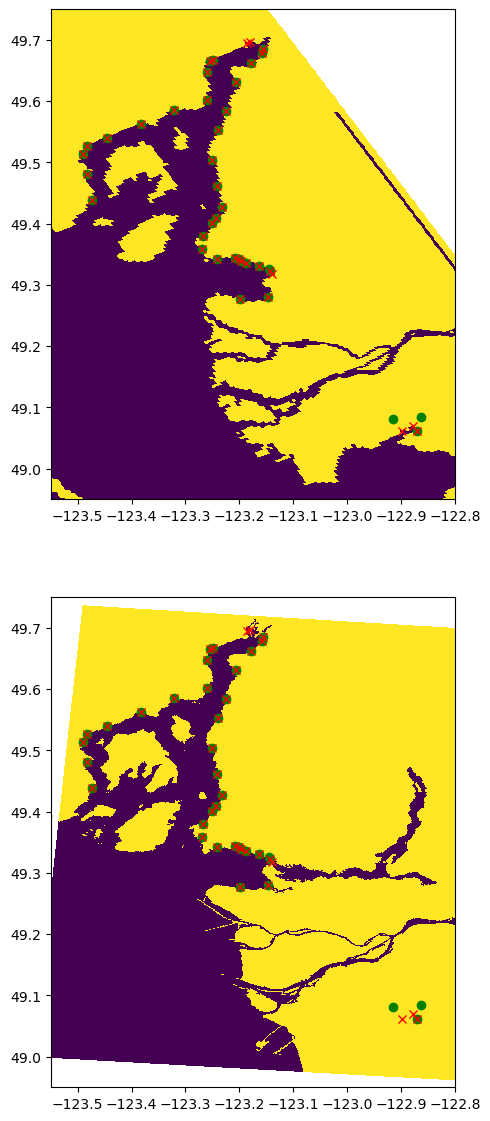

In [98]:
istart = 200
iend = 600
jstart = 150
jend = 390

fig, axs = plt.subplots(2, 1, figsize=(10, 14))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)

for i in range(istart, iend+1):
        for j in range(jstart, jend+1):
            if r202108[i, j] > 0:
                xx = 0.5 * (nav_lon[i, j] + nav_lon[i+1, j+1])
                yy = 0.5 * (nav_lat[i, j] + nav_lat[i+1, j+1]) 
                axs[0].plot(xx, yy, 'rx')
                axs[1].plot(xx, yy, 'rx')

for ax in axs:
    ax.set_xlim(-123.55, -122.8)
    ax.set_ylim(48.95, 49.75)
    viz_tools.set_aspect(ax, coords='map')
    

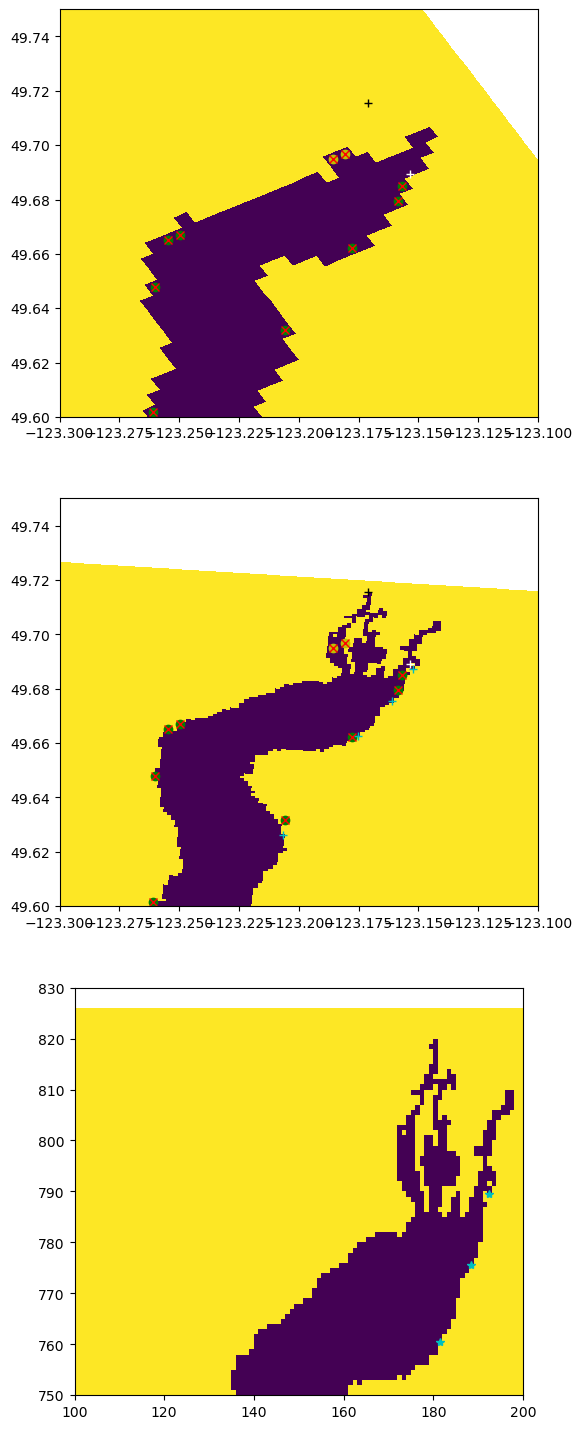

In [186]:
istart = 200
iend = 600
jstart = 150
jend = 390

fig, axs = plt.subplots(3, 1, figsize=(10, 18))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)


for i in range(istart, iend+1):
        for j in range(jstart, jend+1):
            if r202108[i, j] > 0:
                xx = 0.5 * (nav_lon[i, j] + nav_lon[i+1, j+1])
                yy = 0.5 * (nav_lat[i, j] + nav_lat[i+1, j+1]) 
                axs[0].plot(xx, yy, 'rx')
                axs[1].plot(xx, yy, 'rx')

for ax in axs[:2]:
    ax.set_xlim(-123.3, -123.1)
    ax.set_ylim(49.6, 49.75)
    viz_tools.set_aspect(ax, coords='map')
    ax.plot(-123.171161, 49.715531, 'k+')
    ax.plot(-123.153556, 49.689229, 'w+')


plot_newrivers_index(axs[2], with_coords, bynumber=True)

axs[2].set_xlim(100, 200)
axs[2].set_ylim(750, 830)
viz_tools.set_aspect(axs[2]);

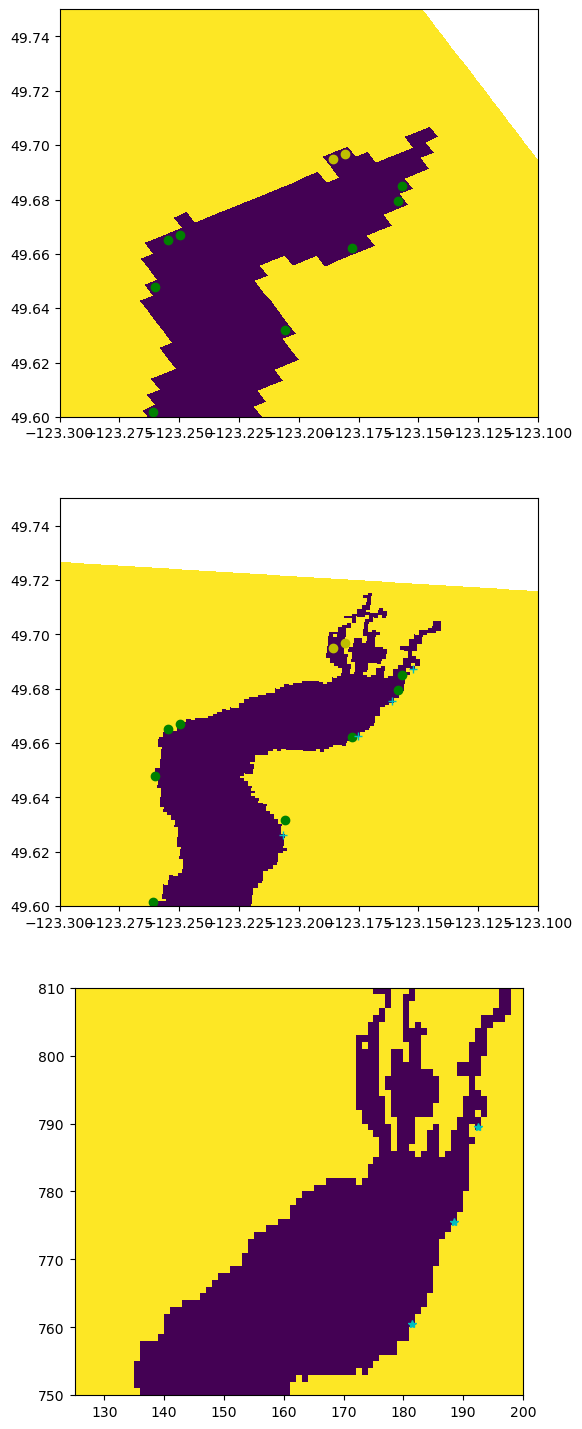

In [187]:
istart = 200
iend = 600
jstart = 150
jend = 390

fig, axs = plt.subplots(3, 1, figsize=(10, 18))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)

for ax in axs[:2]:
    ax.set_xlim(-123.3, -123.1)
    ax.set_ylim(49.6, 49.75)
    viz_tools.set_aspect(ax, coords='map')


plot_newrivers_index(axs[2], with_coords, bynumber=True)

axs[2].set_xlim(125, 200)
axs[2].set_ylim(750, 810)
viz_tools.set_aspect(axs[2]);

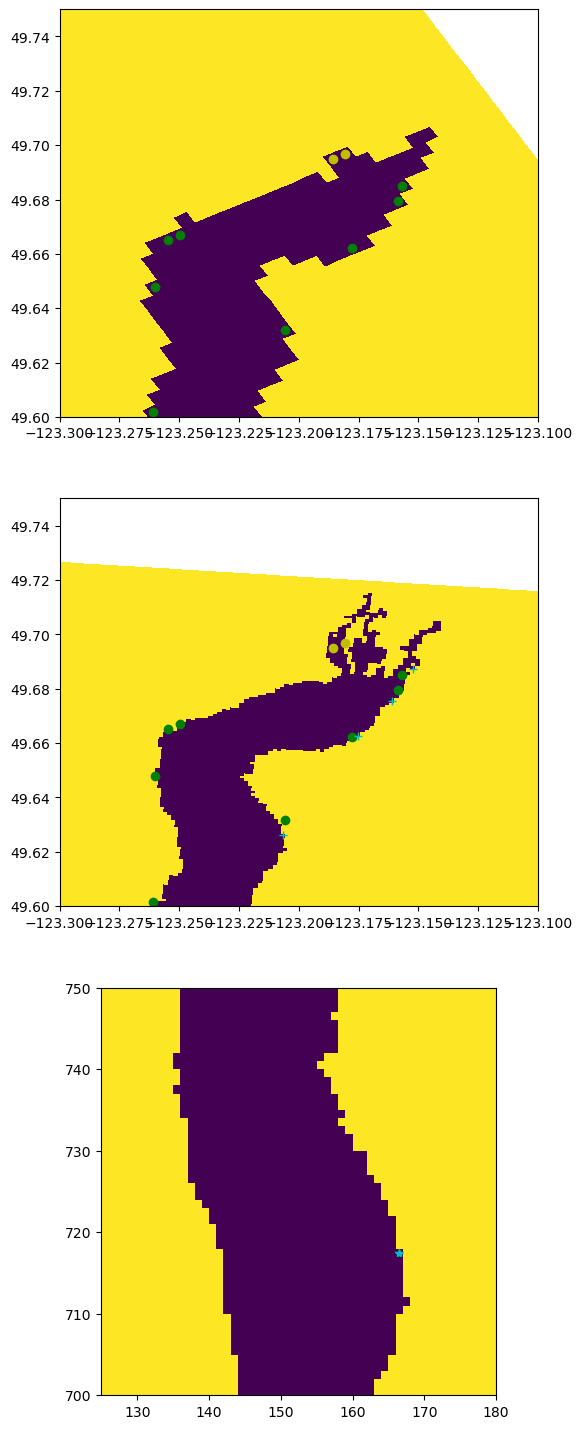

In [190]:
istart = 200
iend = 600
jstart = 150
jend = 390

fig, axs = plt.subplots(3, 1, figsize=(10, 18))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)

for ax in axs[:2]:
    ax.set_xlim(-123.3, -123.1)
    ax.set_ylim(49.6, 49.75)
    viz_tools.set_aspect(ax, coords='map')


plot_newrivers_index(axs[2], with_coords, bynumber=True)

axs[2].set_xlim(125, 180)
axs[2].set_ylim(700, 750)
viz_tools.set_aspect(axs[2]);

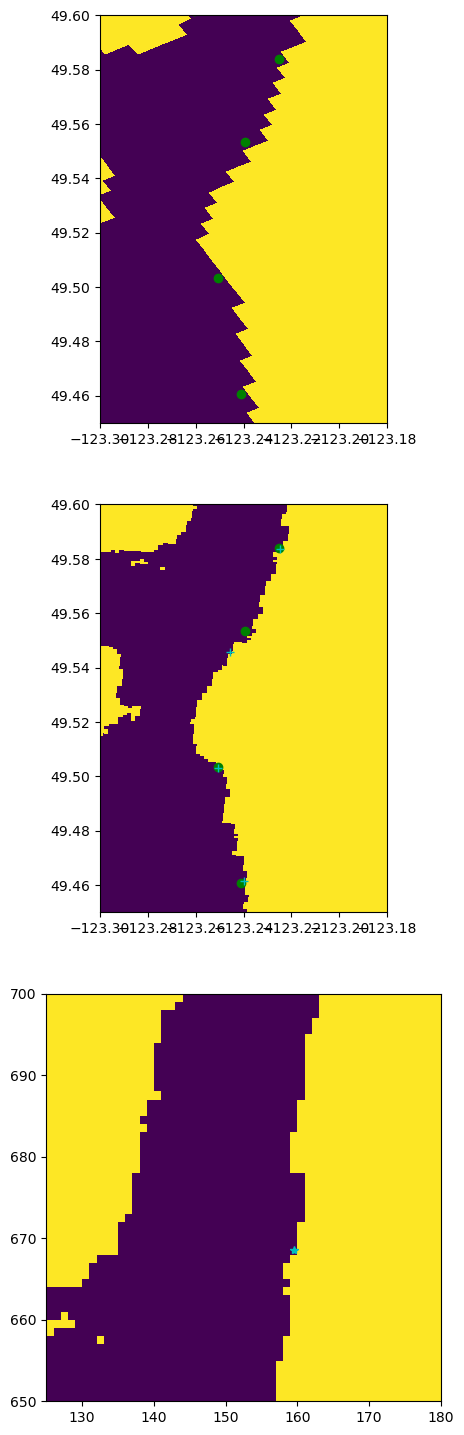

In [195]:
istart = 200
iend = 600
jstart = 150
jend = 390

fig, axs = plt.subplots(3, 1, figsize=(10, 18))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)

for ax in axs[:2]:
    ax.set_xlim(-123.3, -123.18)
    ax.set_ylim(49.45, 49.6)
    viz_tools.set_aspect(ax, coords='map')


plot_newrivers_index(axs[2], with_coords, bynumber=True)

axs[2].set_xlim(125, 180)
axs[2].set_ylim(650, 700)
viz_tools.set_aspect(axs[2]);

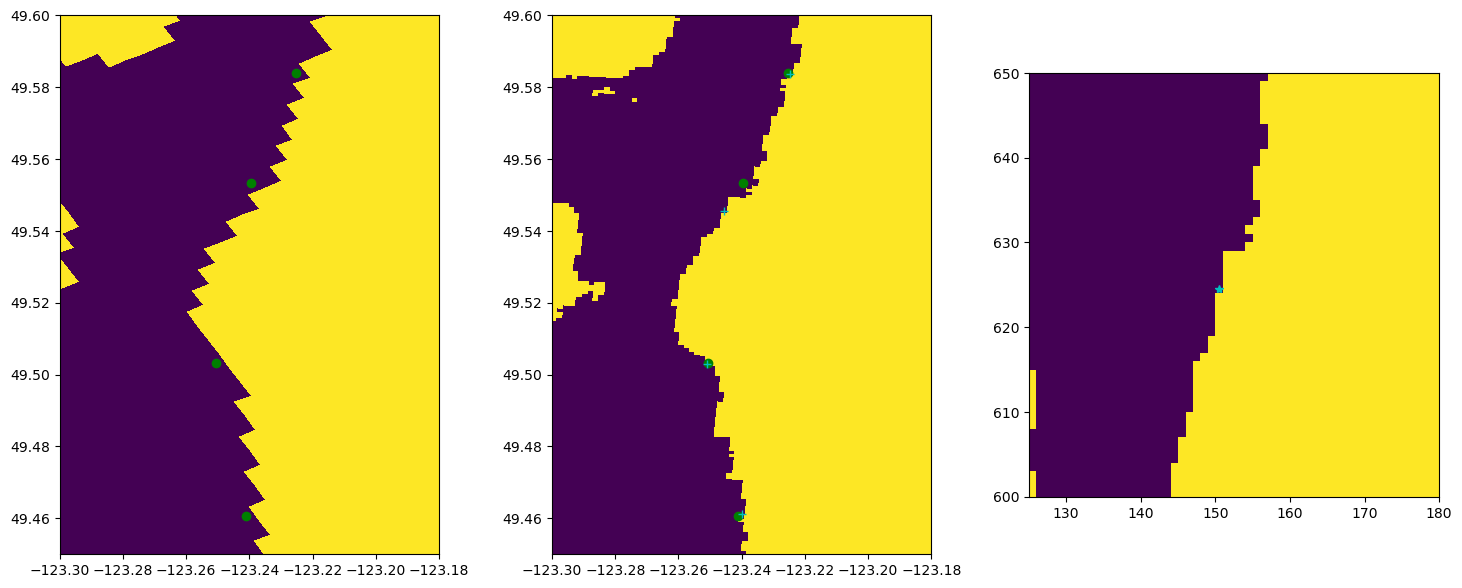

In [196]:
istart = 200
iend = 600
jstart = 150
jend = 390

fig, axs = plt.subplots(1, 3, figsize=(18, 7))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)

for ax in axs[:2]:
    ax.set_xlim(-123.3, -123.18)
    ax.set_ylim(49.45, 49.6)
    viz_tools.set_aspect(ax, coords='map')


plot_newrivers_index(axs[2], with_coords, bynumber=True)

axs[2].set_xlim(125, 180)
axs[2].set_ylim(600, 650)
viz_tools.set_aspect(axs[2]);

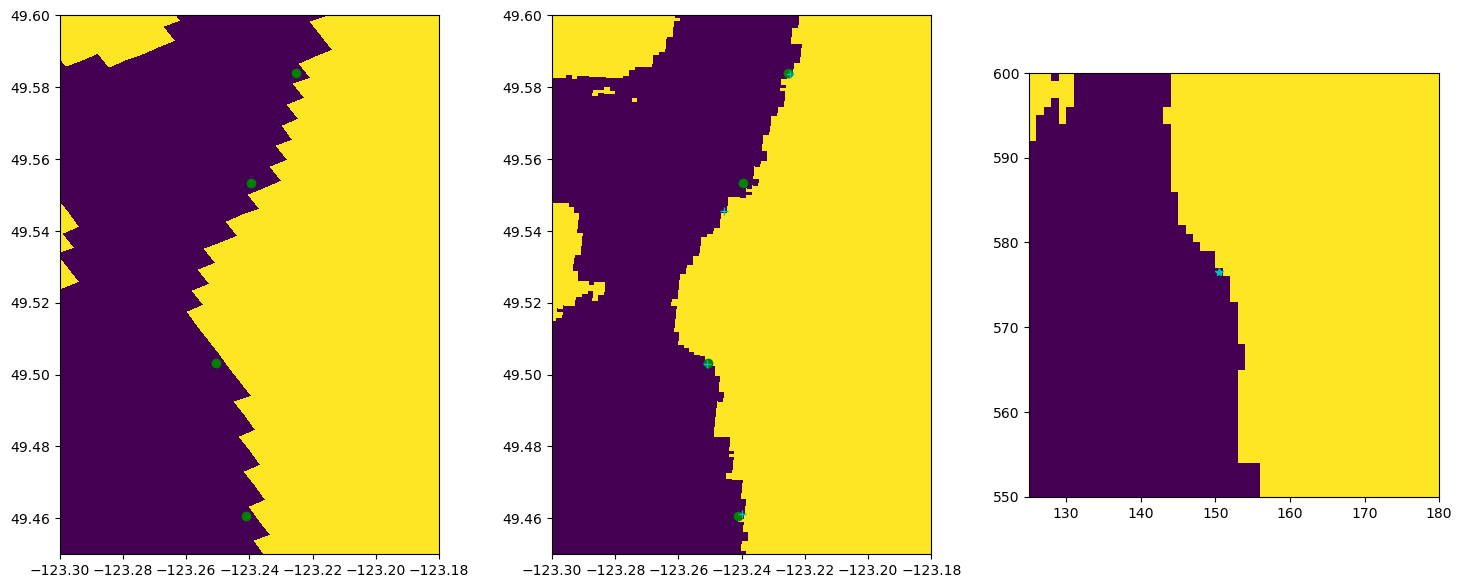

In [197]:
istart = 200
iend = 600
jstart = 150
jend = 390

fig, axs = plt.subplots(1, 3, figsize=(18, 7))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)

for ax in axs[:2]:
    ax.set_xlim(-123.3, -123.18)
    ax.set_ylim(49.45, 49.6)
    viz_tools.set_aspect(ax, coords='map')


plot_newrivers_index(axs[2], with_coords, bynumber=True)

axs[2].set_xlim(125, 180)
axs[2].set_ylim(550, 600)
viz_tools.set_aspect(axs[2]);

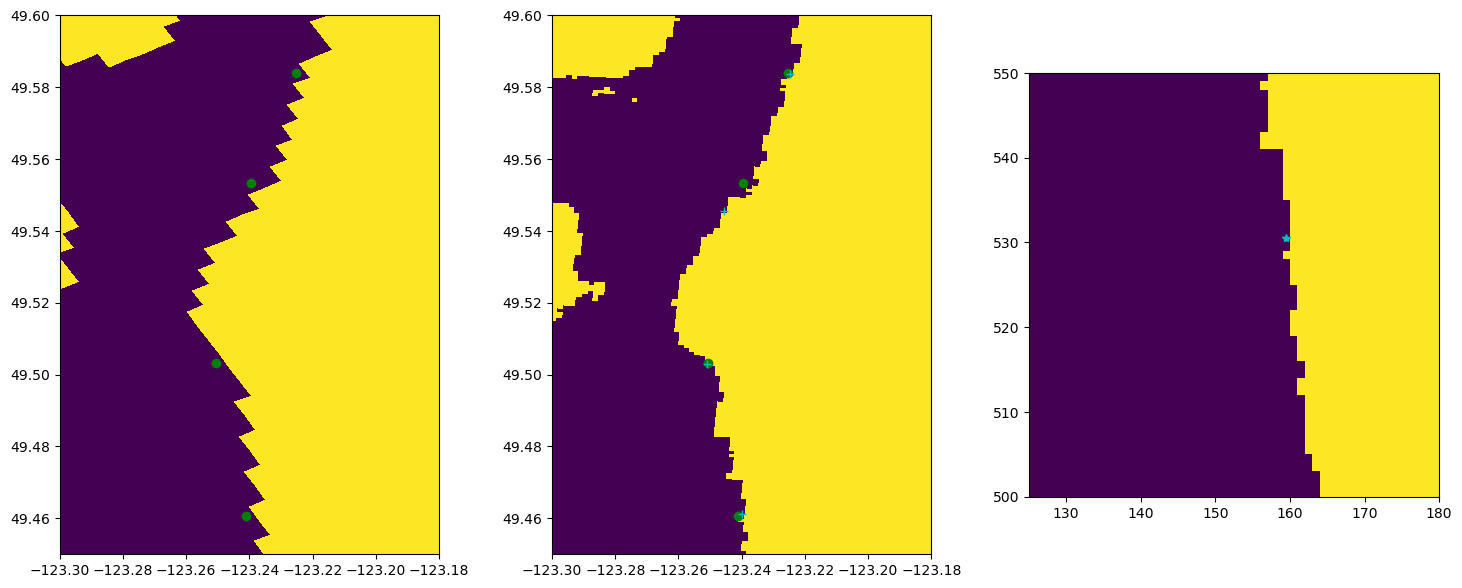

In [198]:
istart = 200
iend = 600
jstart = 150
jend = 390

fig, axs = plt.subplots(1, 3, figsize=(18, 7))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)

for ax in axs[:2]:
    ax.set_xlim(-123.3, -123.18)
    ax.set_ylim(49.45, 49.6)
    viz_tools.set_aspect(ax, coords='map')


plot_newrivers_index(axs[2], with_coords, bynumber=True)

axs[2].set_xlim(125, 180)
axs[2].set_ylim(500, 550)
viz_tools.set_aspect(axs[2]);

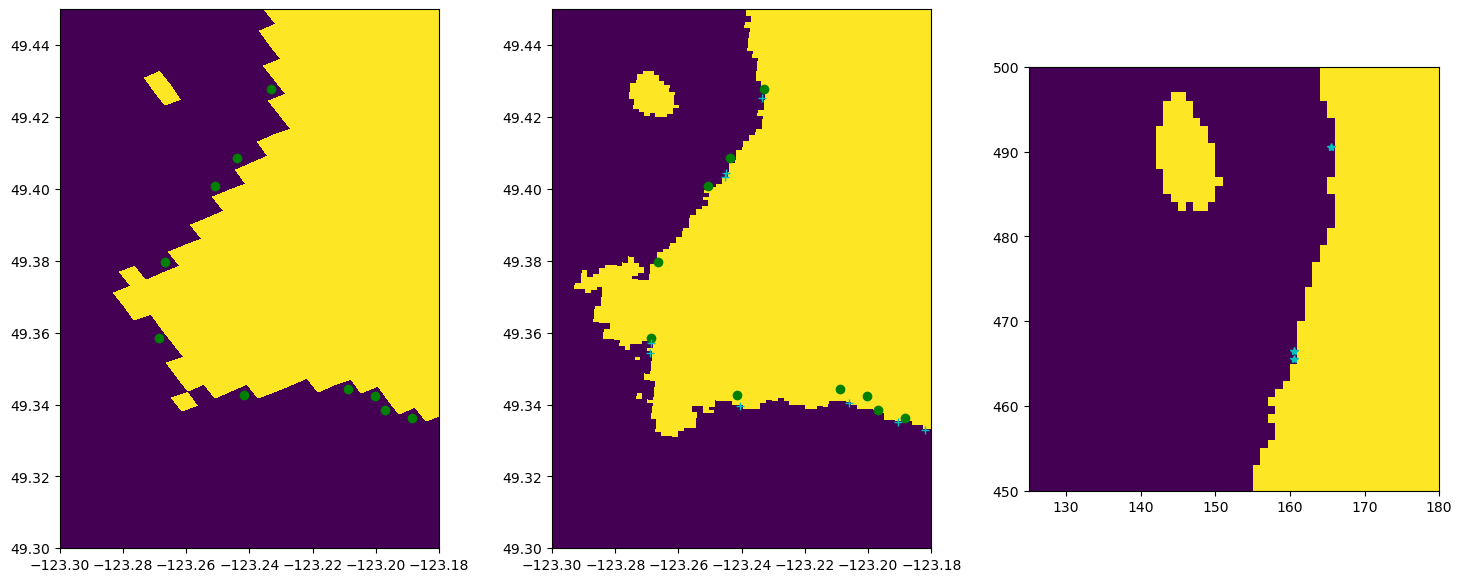

In [200]:
istart = 200
iend = 600
jstart = 150
jend = 390

fig, axs = plt.subplots(1, 3, figsize=(18, 7))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)

for ax in axs[:2]:
    ax.set_xlim(-123.3, -123.18)
    ax.set_ylim(49.3, 49.45)
    viz_tools.set_aspect(ax, coords='map')


plot_newrivers_index(axs[2], with_coords, bynumber=True)

axs[2].set_xlim(125, 180)
axs[2].set_ylim(450, 500)
viz_tools.set_aspect(axs[2]);

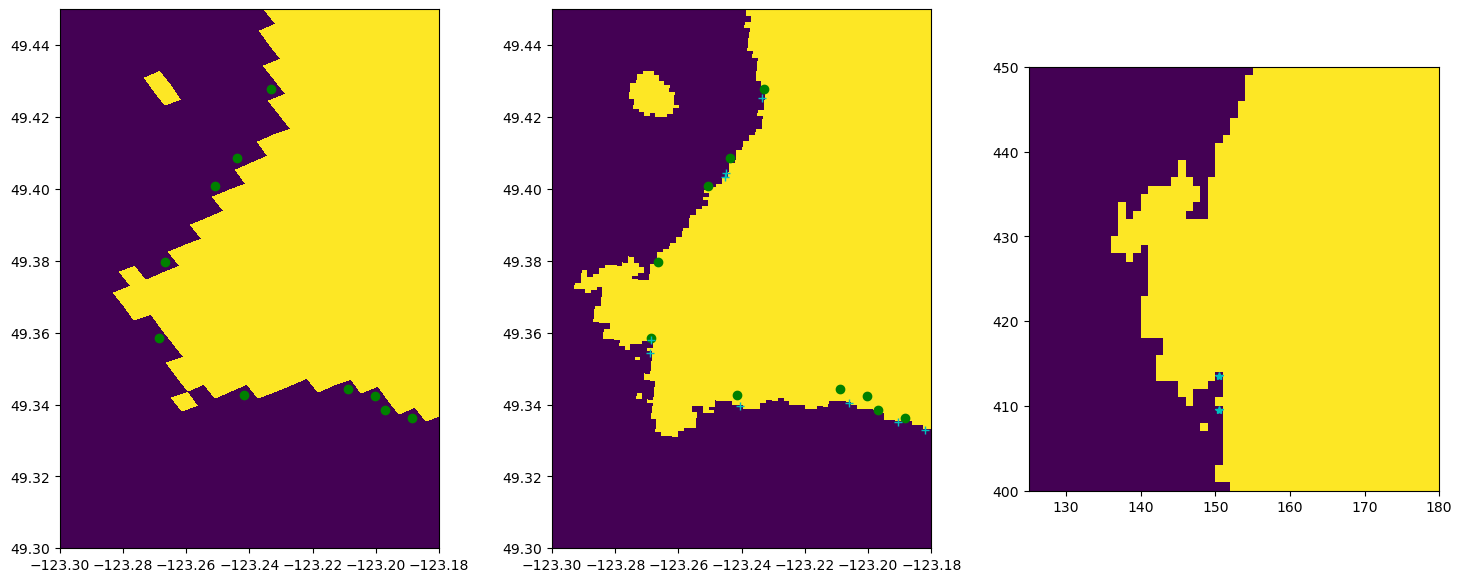

In [203]:
istart = 200
iend = 600
jstart = 150
jend = 390

fig, axs = plt.subplots(1, 3, figsize=(18, 7))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)

for ax in axs[:2]:
    ax.set_xlim(-123.3, -123.18)
    ax.set_ylim(49.3, 49.45)
    viz_tools.set_aspect(ax, coords='map')


plot_newrivers_index(axs[2], with_coords, bynumber=True)

axs[2].set_xlim(125, 180)
axs[2].set_ylim(400, 450)
viz_tools.set_aspect(axs[2]);

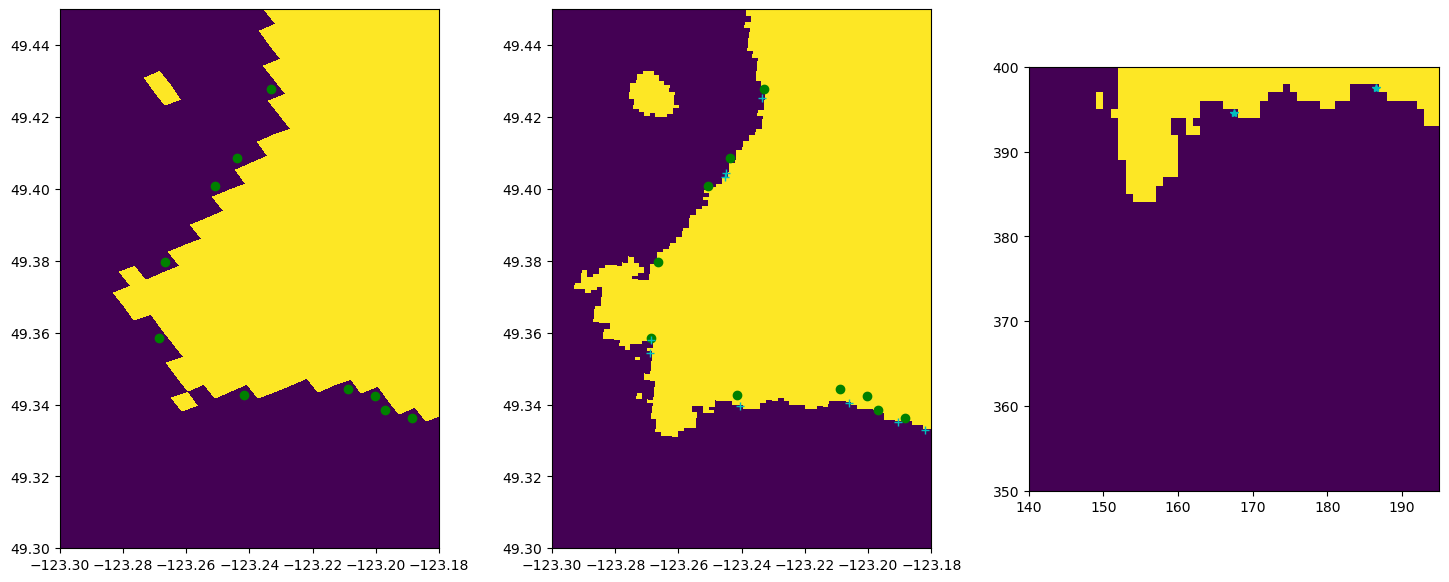

In [205]:
fig, axs = plt.subplots(1, 3, figsize=(18, 7))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)

for ax in axs[:2]:
    ax.set_xlim(-123.3, -123.18)
    ax.set_ylim(49.3, 49.45)
    viz_tools.set_aspect(ax, coords='map')


plot_newrivers_index(axs[2], with_coords, bynumber=True)

axs[2].set_xlim(140, 195)
axs[2].set_ylim(350, 400)
viz_tools.set_aspect(axs[2]);

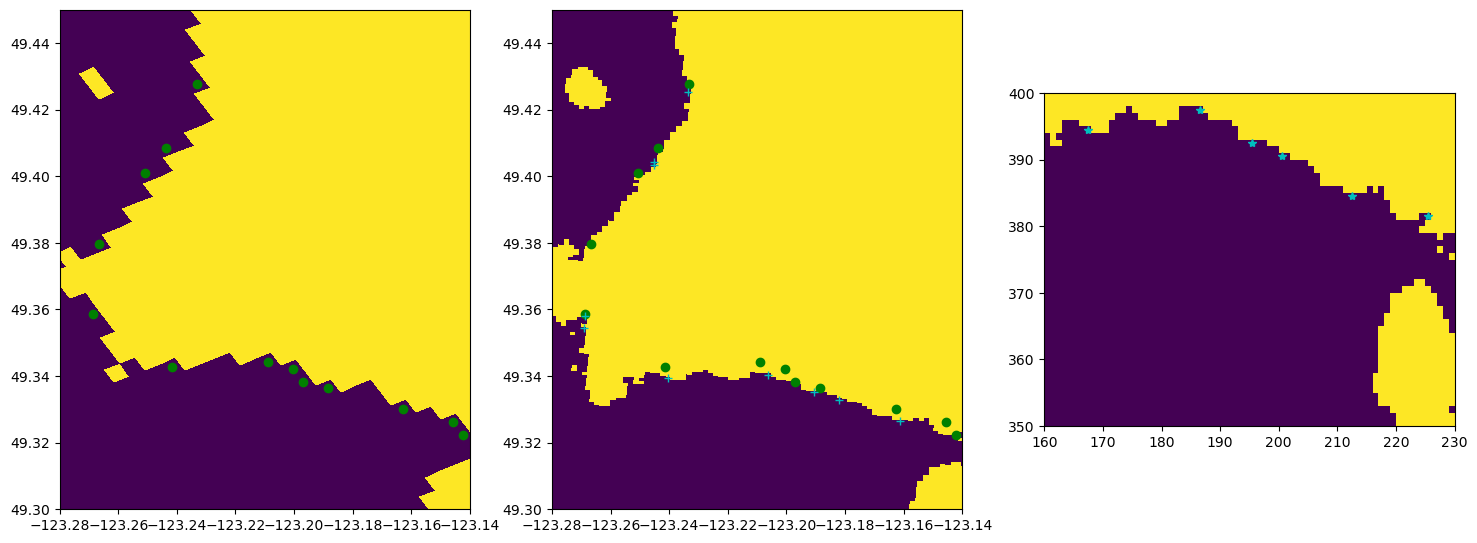

In [214]:
fig, axs = plt.subplots(1, 3, figsize=(18, 7))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)

for ax in axs[:2]:
    ax.set_xlim(-123.28, -123.14)
    ax.set_ylim(49.3, 49.45)
    viz_tools.set_aspect(ax, coords='map')


plot_newrivers_index(axs[2], with_coords, bynumber=True)

axs[2].set_xlim(160, 230)
axs[2].set_ylim(350, 400)
viz_tools.set_aspect(axs[2]);

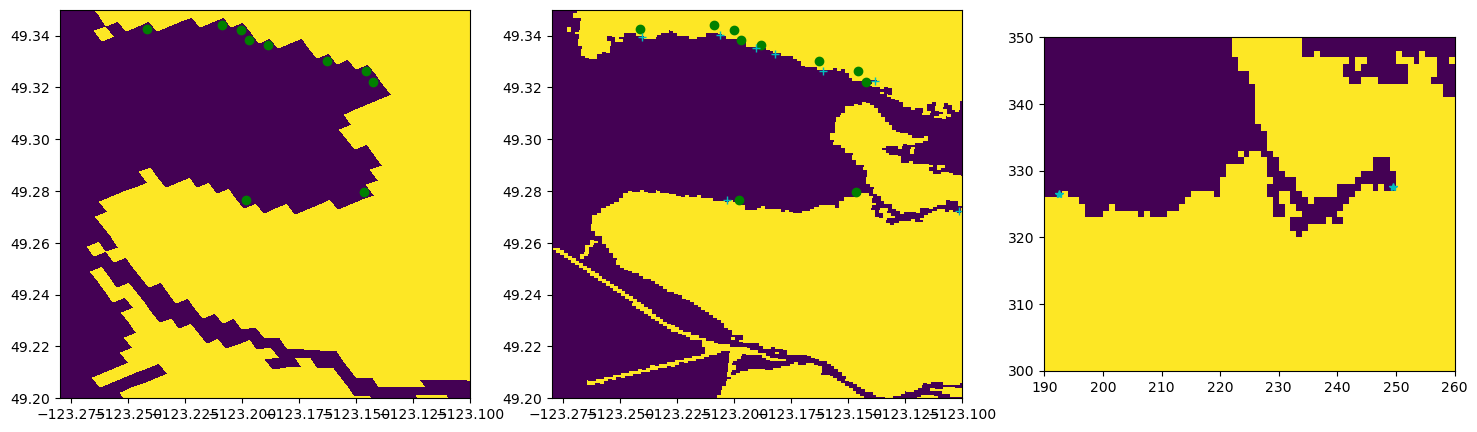

In [227]:
fig, axs = plt.subplots(1, 3, figsize=(18, 7))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)

for ax in axs[:2]:
    ax.set_xlim(-123.28, -123.1)
    ax.set_ylim(49.2, 49.35)
    viz_tools.set_aspect(ax, coords='map')


plot_newrivers_index(axs[2], with_coords, bynumber=True)

axs[2].set_xlim(190, 260)
axs[2].set_ylim(300, 350)
viz_tools.set_aspect(axs[2]);

## Now Back to Howe Sound to do the West Side

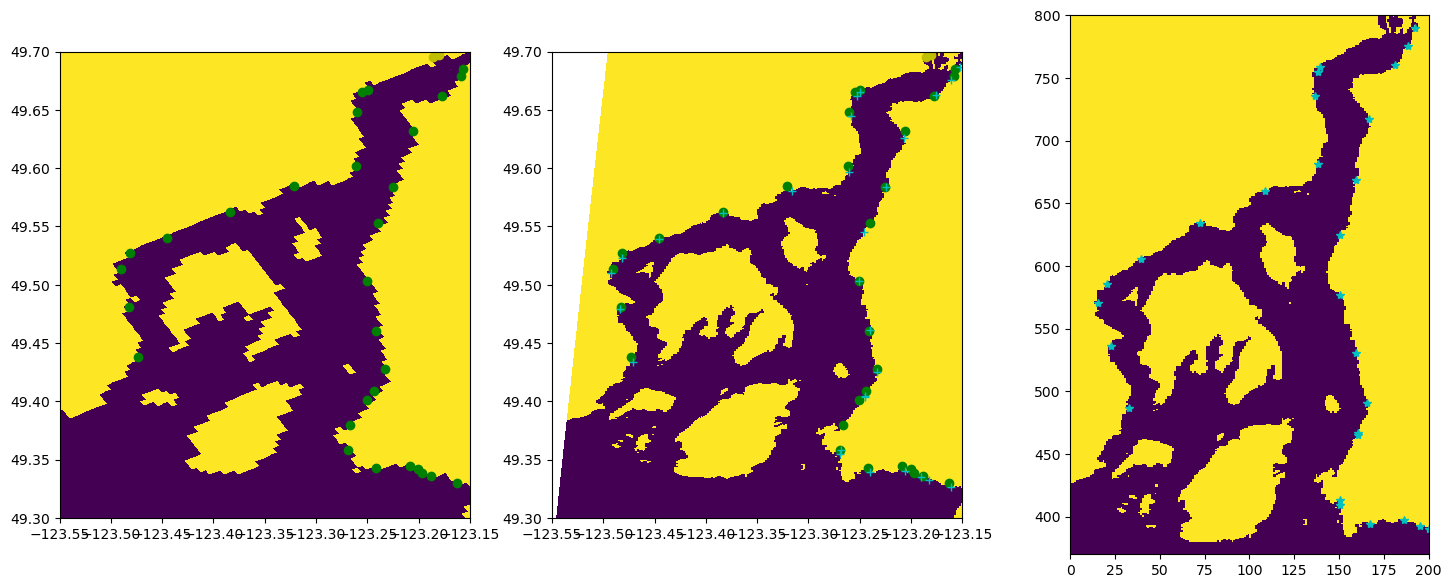

In [254]:
fig, axs = plt.subplots(1, 3, figsize=(18, 7))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

for ax in axs[:2]:
    ax.set_xlim(-123.55, -123.15)
    ax.set_ylim(49.3, 49.7)
    viz_tools.set_aspect(ax, coords='map')

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)
plot_newrivers_index(axs[2], with_coords, bynumber=True)

axs[2].set_xlim(0, 200)
axs[2].set_ylim(370, 800)
axs[2].set_aspect(0.7);

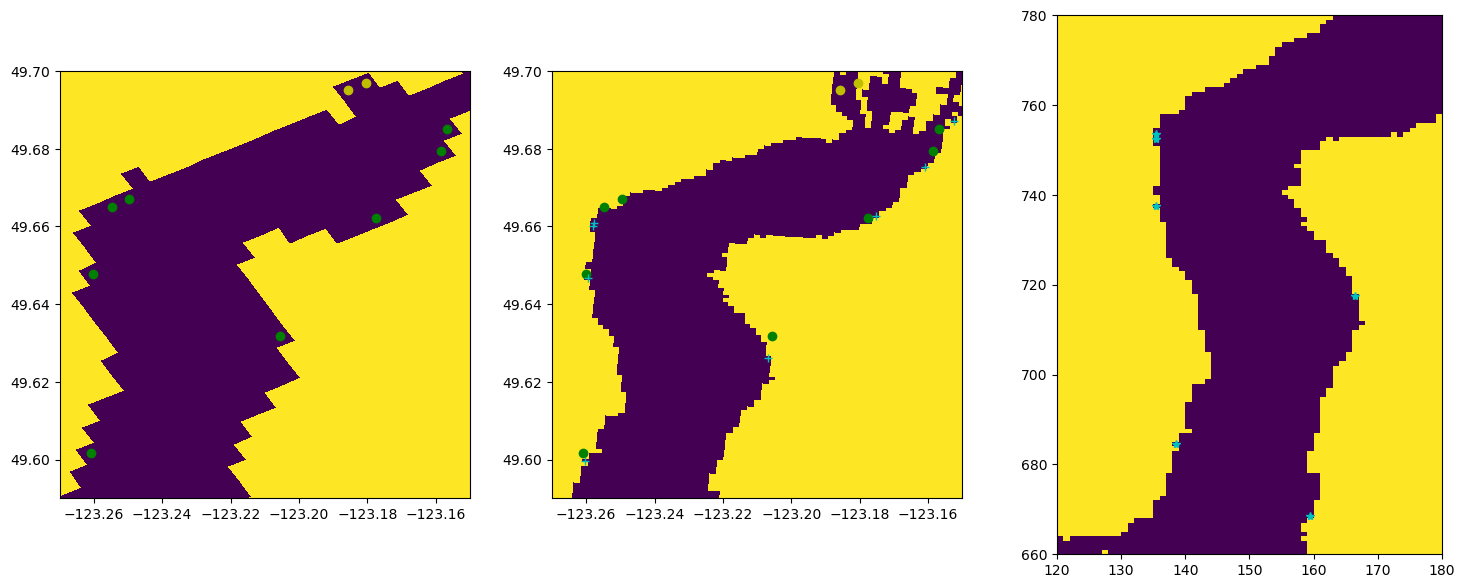

In [269]:
fig, axs = plt.subplots(1, 3, figsize=(18, 7))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

for ax in axs[:2]:
    ax.set_xlim(-123.27, -123.15)
    ax.set_ylim(49.59, 49.7)
    viz_tools.set_aspect(ax, coords='map')

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)
plot_newrivers_index(axs[2], with_coords, bynumber=True)

#axs[2].plot(135+0.5, 753+0.5, 'cx')
#axs[2].plot(135+0.5, 752+0.5, 'cx')
#axs[2].plot(135+0.5, 737+0.5, 'cx')
#axs[2].plot(138+0.5, 684+0.5, 'cx')

axs[2].set_xlim(120, 180)
axs[2].set_ylim(660, 780)
axs[2].set_aspect(0.7);

WoodfibreB 753, 135  
Woodfibre 752, 135  
Foulger 737, 135  
Ellesmere 684, 138  
done

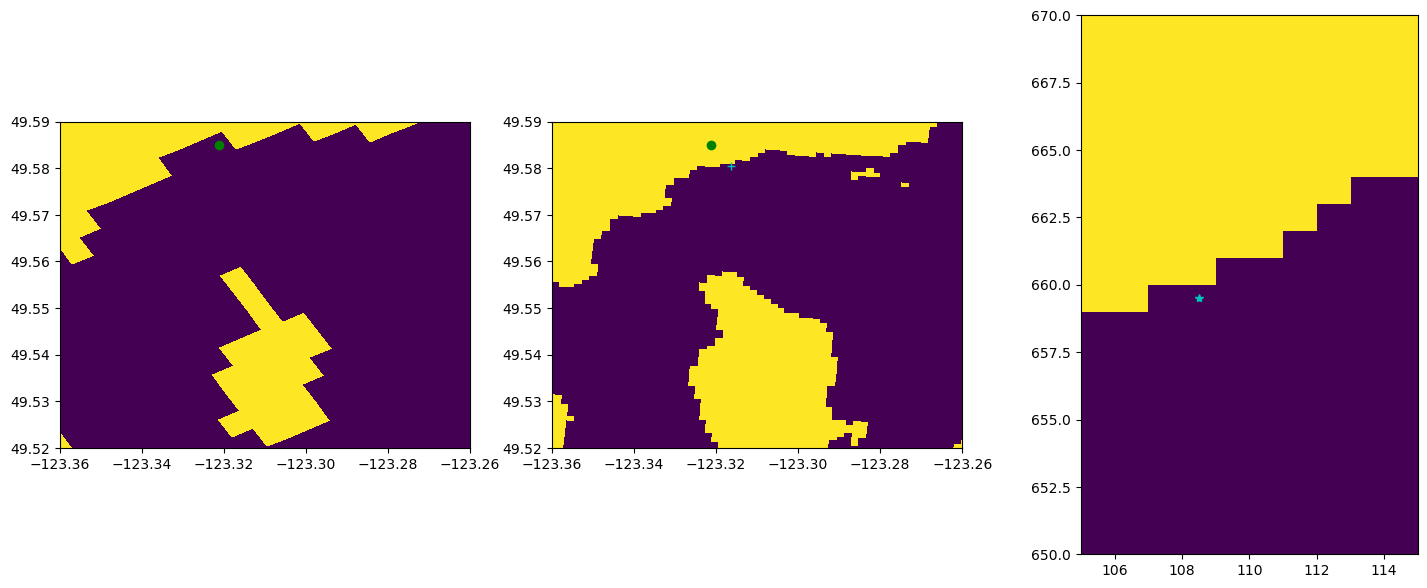

In [282]:
fig, axs = plt.subplots(1, 3, figsize=(18, 7))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

for ax in axs[:2]:
    ax.set_xlim(-123.36, -123.26)
    ax.set_ylim(49.52, 49.59)
    viz_tools.set_aspect(ax, coords='map')

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)
plot_newrivers_index(axs[2], with_coords, bynumber=True)


#axs[2].set_xlim(85, 130)
#axs[2].set_ylim(620, 680)
axs[2].set_xlim(105, 115)
axs[2].set_ylim(650, 670)
axs[2].set_aspect(0.8);

Potlatch fine


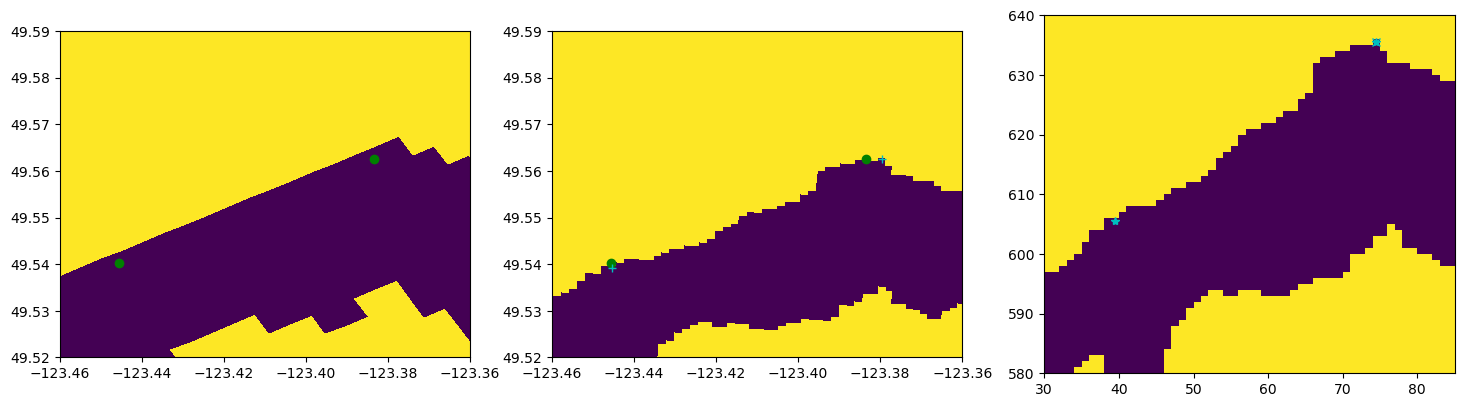

In [294]:
fig, axs = plt.subplots(1, 3, figsize=(18, 7))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

for ax in axs[:2]:
    ax.set_xlim(-123.46, -123.36)
    ax.set_ylim(49.52, 49.59)
    viz_tools.set_aspect(ax, coords='map')

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)
plot_newrivers_index(axs[2], with_coords, bynumber=True)

#axs[2].plot(74+0.5, 635+0.5, 'cx')


axs[2].set_xlim(30, 85)
axs[2].set_ylim(580, 640)
axs[2].set_aspect(0.8);

In [ ]:
McNab 635, 74
Bain fine


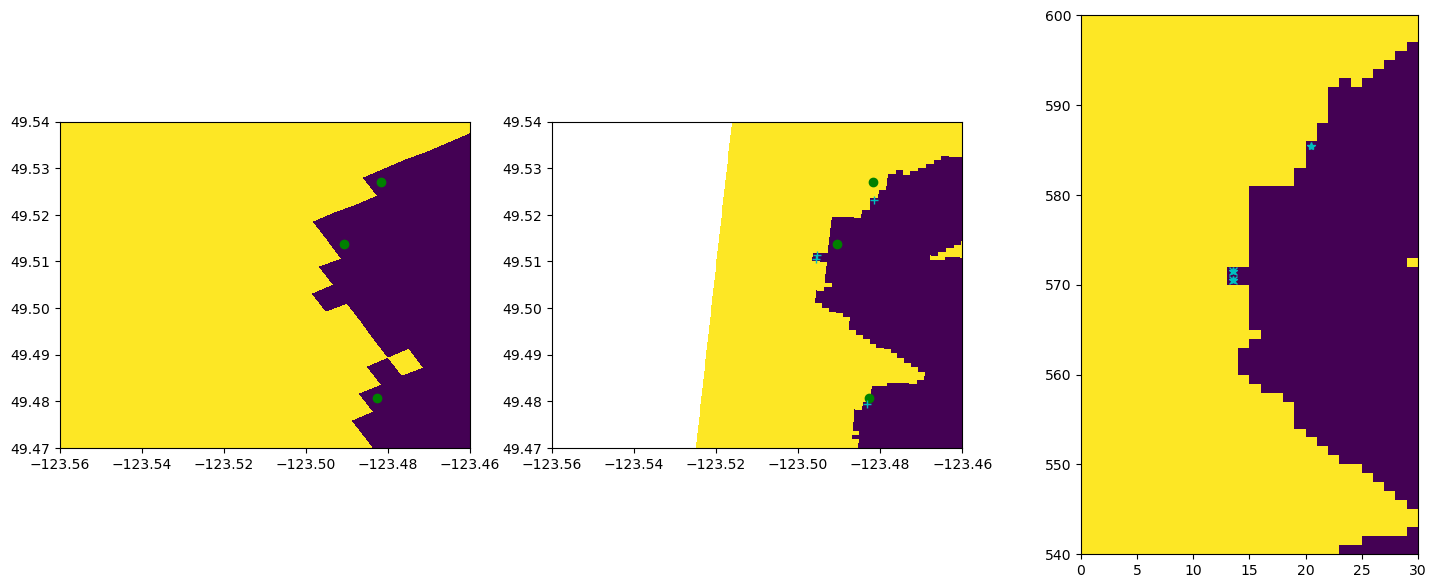

In [364]:
fig, axs = plt.subplots(1, 3, figsize=(18, 7))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

for ax in axs[:2]:
    ax.set_xlim(-123.56, -123.46)
    ax.set_ylim(49.47, 49.54)
    viz_tools.set_aspect(ax, coords='map')

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)
plot_newrivers_index(axs[2], with_coords, bynumber=True)

axs[2].plot(13+0.5, 570+0.5, 'cx')
axs[2].plot(13+0.5, 571+0.5, 'cx')

axs[2].set_xlim(0, 30)
axs[2].set_ylim(540, 600)
axs[2].set_aspect(0.8);

In [348]:
print ('Rainy', locations['Rainy'])

Rainy [49.523, -123.483, 585, 20]


Rainy  Good
McNair and now McNairB fixed


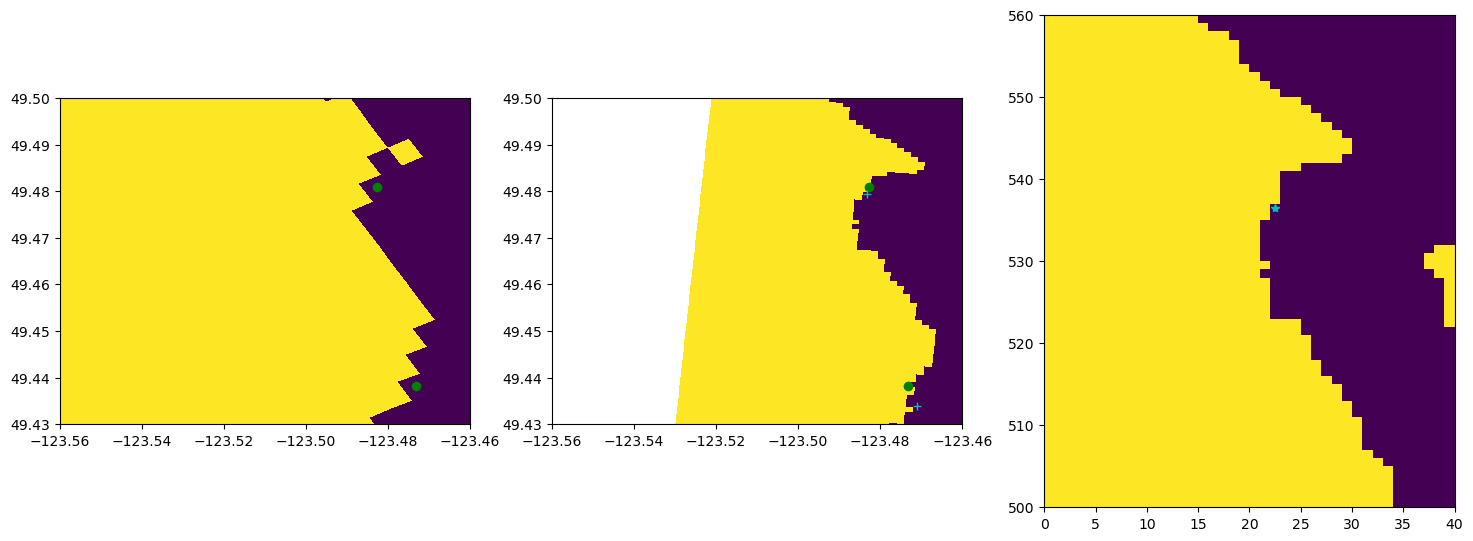

In [365]:
fig, axs = plt.subplots(1, 3, figsize=(18, 7))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

for ax in axs[:2]:
    ax.set_xlim(-123.56, -123.46)
    ax.set_ylim(49.43, 49.5)
    viz_tools.set_aspect(ax, coords='map')

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)
plot_newrivers_index(axs[2], with_coords, bynumber=True)

axs[2].set_xlim(0, 40)
axs[2].set_ylim(500, 560)
axs[2].set_aspect(0.8);

In [359]:
print ('Twin', locations['Twin'])

Twin [49.48, -123.485, 536, 22]


In [ ]:
Twin  good


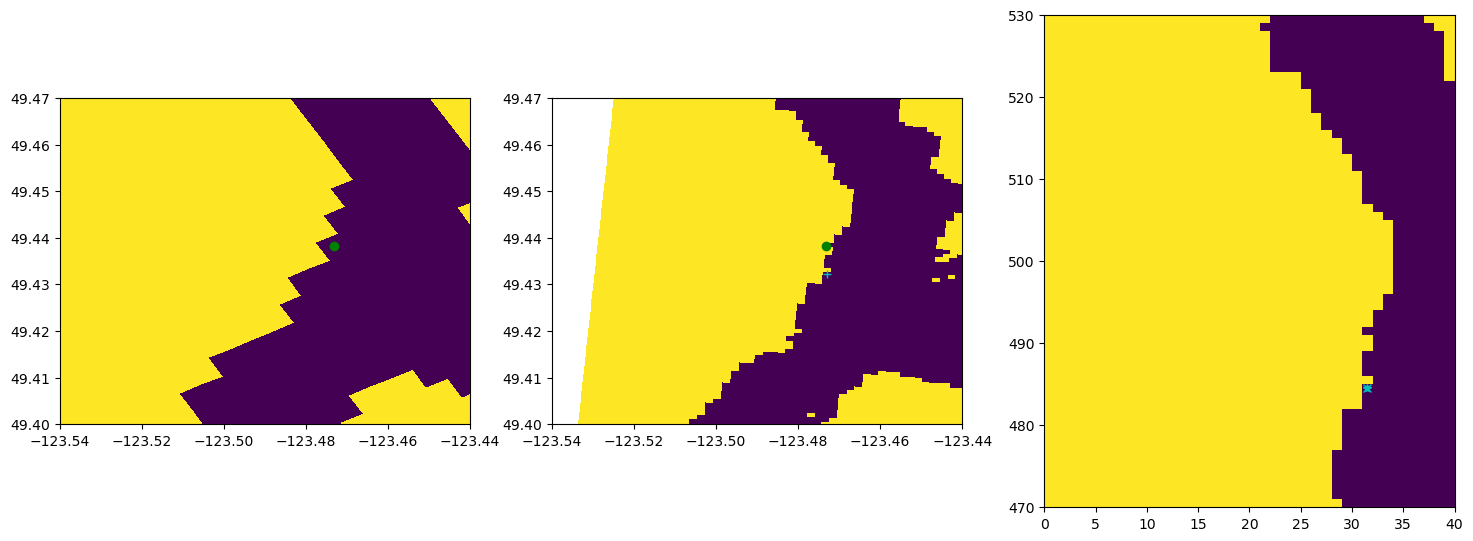

In [374]:
fig, axs = plt.subplots(1, 3, figsize=(18, 7))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

for ax in axs[:2]:
    ax.set_xlim(-123.54, -123.44)
    ax.set_ylim(49.4, 49.47)
    viz_tools.set_aspect(ax, coords='map')

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)
plot_newrivers_index(axs[2], with_coords, bynumber=True)

axs[2].plot(31+0.5, 484+0.5, 'cx')

axs[2].set_xlim(0, 40)
axs[2].set_ylim(470, 530)
axs[2].set_aspect(0.8);

In [ ]:
Langdale fixed


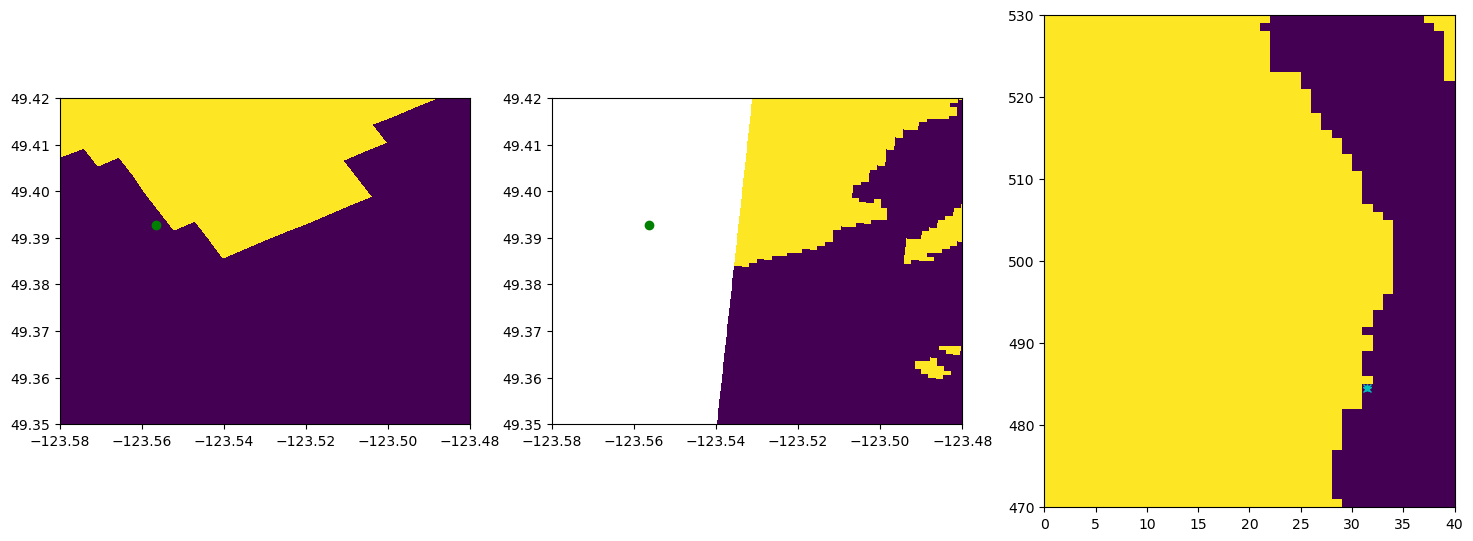

In [376]:
fig, axs = plt.subplots(1, 3, figsize=(18, 7))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

for ax in axs[:2]:
    ax.set_xlim(-123.58, -123.48)
    ax.set_ylim(49.35, 49.42)
    viz_tools.set_aspect(ax, coords='map')

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)
plot_newrivers_index(axs[2], with_coords, bynumber=True)

axs[2].plot(31+0.5, 484+0.5, 'cx')

axs[2].set_xlim(0, 40)
axs[2].set_ylim(470, 530)
axs[2].set_aspect(0.8);

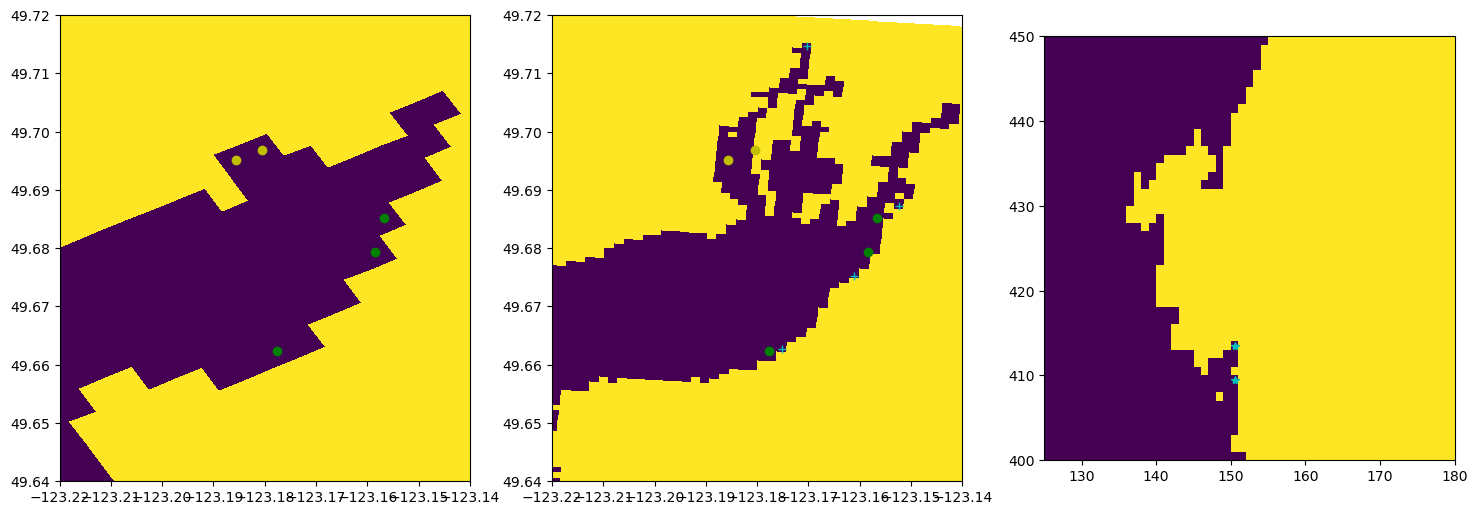

In [402]:
istart = 200
iend = 600
jstart = 150
jend = 390

fig, axs = plt.subplots(1, 3, figsize=(18, 7))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)

for ax in axs[:2]:
    ax.set_xlim(-123.22, -123.14)
    ax.set_ylim(49.64, 49.72)
    viz_tools.set_aspect(ax, coords='map')


plot_newrivers_index(axs[2], with_coords, bynumber=True)

axs[2].set_xlim(125, 180)
axs[2].set_ylim(400, 450)
viz_tools.set_aspect(axs[2]);

Chester
Roberts
Rume
all outside the domain.

Need to fix the bathymetry around Squamish.  
Don't use google maps (bad on rivers), use imap BC: maps.gov.bc.ca/  
though google satellite view can be useful too.


On the maps, choose BaseMaps, FWA and


    FWA - Stream Network - Labels
    FWA - Stream Network - Lines
    FWA - Rivers - Outlined
    FWA - Lakes - Labels
    FWA - Lakes - Outlined
    FWA - Named Watersheds - Outlined 

In [228]:
(23.16 + 20.66 + 10.38 + 10.24 +
                           93.71 + 195.12 + 342.65)

695.92

In [403]:
with open('Outside_First_Narrows_Locations.yaml', 'w') as file:
        yaml.dump(with_coords, file)

In [404]:
with_coords

{'Stawanus': [49.68749, -123.15352, 789, 192],
 'Shannon': [49.67507, -123.16146, 775, 188],
 'Gonzalos': [49.66183, -123.17643, 760, 181],
 'Britannia': [49.62578, -123.20705, 717, 166],
 'Furry': [49.58307, -123.22679, 668, 159],
 'Kallahn': [49.54513, -123.24604, 624, 150],
 'Deeks': [49.50251, -123.25068, 576, 150],
 'Harvey': [49.46062, -123.24057, 530, 159],
 'Turpin': [49.42491, -123.23297, 490, 165],
 'Sclufield': [49.40422, -123.24456, 466, 160],
 'Disbrow': [49.40201, -123.24644, 465, 160],
 'Whyte': [49.35692, -123.26829, 413, 150],
 'Eagle': [49.35353, -123.2682, 409, 150],
 'Cypress': [49.33874, -123.24125, 394, 167],
 'Westmount': [49.34023, -123.20606, 397, 186],
 'Rodgers': [49.33486, -123.19246, 392, 195],
 'Marr': [49.3329, -123.18332, 390, 200],
 'Lawson': [49.32672, -123.16194, 384, 212],
 'Capilano': [49.32093, -123.14165, 381, 225],
 'Jericho': [49.276, -123.203, 326, 192],
 'FalseCreek': [49.276, -123.139, 327, 249],
 'WoodfibreB': [49.666, -123.253, 753, 135],
 

In [383]:
areas = {}
proportion = {}
other_proportion = {}

In [385]:
for river in with_coords:
#    print (river)
#    if river in old_rivers:
#        print ('old', river, old_rivers[river]['prop'])
#    if river in fixed_rivers:
#        print ('fix', river, fixed_rivers[river]['prop'])
    if river in howe:
#        print ('h', river, howe[river]['prop'])
        proportion[river] = howe[river]['prop']
    else:
        print ('no prob', river)
for river in howe:
    if river not in with_coords:
        print ('mising', river, howe[river]['prop'])
        other_proportion[river] = howe[river]['prop']

no prob WoodfibreB
no prob McNairB
mising FirstNarrows 0.1294681892089998
mising Chester 0.004572836088569398
mising Roberts 0.009084279341124641
mising Rume 0.0017059766856054263


Both Woodfibre and McNair are double wides.

In [392]:
print (sum(proportion.values()))
print (sum(other_proportion.values()))
print (sum(proportion.values()) + sum(other_proportion.values()))

0.8551687186757007
0.14483128132429926
0.9999999999999999


Now the old area was 5372.22 km2 and we need to add 149.18 km2 for Coquitlam.  So all proportions need to be corrected by 5372.22/(5372.22 + 149.18)

In [393]:
for river in proportion:
    proportion[river] = proportion[river] * 5372.22/(5372.22 + 149.18)

In [394]:
proportion

{'Stawanus': 0.010455276411766155,
 'Shannon': 0.003247362514319336,
 'Gonzalos': 0.0027151860487619867,
 'Britannia': 0.0062213962997299645,
 'Furry': 0.012015603327788043,
 'Kallahn': 0.002418325707430676,
 'Deeks': 0.003153236064628921,
 'Harvey': 0.0037849693519742093,
 'Turpin': 0.0013793145127710892,
 'Sclufield': 0.00043623989183442586,
 'Disbrow': 0.0005376068376548734,
 'Whyte': 0.0010534921869196508,
 'Eagle': 0.001781162047987863,
 'Cypress': 0.002879907335720214,
 'Westmount': 0.0004348641975697198,
 'Rodgers': 0.0008829060980960977,
 'Marr': 0.001147618636610066,
 'Lawson': 0.0012978589313082296,
 'Capilano': 0.00893658234849195,
 'Jericho': 0.002407464963235628,
 'FalseCreek': 0.004918106996324212,
 'Woodfibre': 0.013206664941178304,
 'Foulger': 0.0031278943281738084,
 'Ellesmere': 0.002776730265867258,
 'Potlatch': 0.00632457336958292,
 'McNab': 0.013159601716333095,
 'Bain': 0.0024147054593656597,
 'Rainy': 0.012907994475814484,
 'McNair': 0.009780100147640676,
 'Twin':

In [395]:
with open('Outside_First_Narrows_Proportions.yaml', 'w') as file:
        yaml.dump(proportion, file)

In [396]:
for river in proportion:
    print (river)

Stawanus
Shannon
Gonzalos
Britannia
Furry
Kallahn
Deeks
Harvey
Turpin
Sclufield
Disbrow
Whyte
Eagle
Cypress
Westmount
Rodgers
Marr
Lawson
Capilano
Jericho
FalseCreek
Woodfibre
Foulger
Ellesmere
Potlatch
McNab
Bain
Rainy
McNair
Twin
Langdale
Squamish


In [413]:
### and lastly locate the Fraser River (not separating tributaries except Pitt River at this point)

In [414]:
Pitt_River_proportion = 1640/(232000) # from Canadian Hydrology Discharge Areas
print (Pitt_River_proportion)

0.007068965517241379


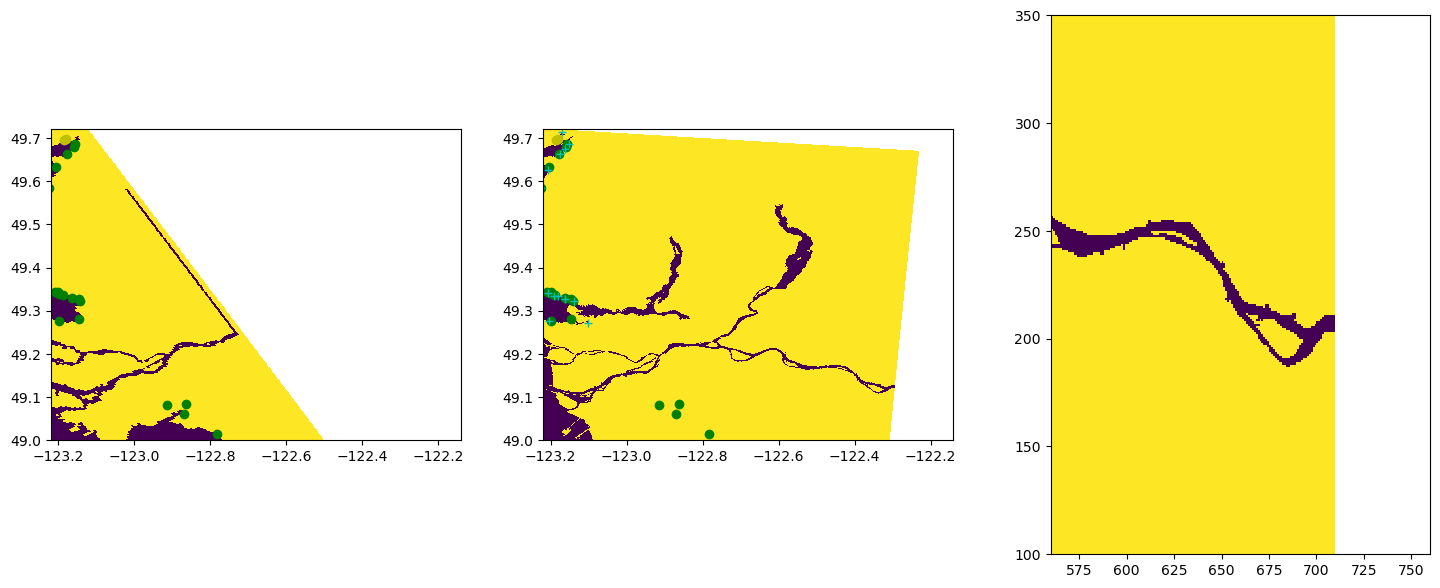

In [412]:
istart = 200
iend = 600
jstart = 150
jend = 390

fig, axs = plt.subplots(1, 3, figsize=(18, 7))
axs[0].pcolormesh(nav_lon, nav_lat, tmask[:-1, :-1])
axs[1].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[2].pcolormesh(bmask)

plot_rivers(axs[0], nav_lon, nav_lat)
plot_rivers(axs[1], nav_lon, nav_lat)
plot_newrivers(axs[1], nnav_lon, nnav_lat, with_coords, bynumber=True)

for ax in axs[:2]:
    ax.set_xlim(-123.22, -122.14)
    ax.set_ylim(49., 49.72)
    viz_tools.set_aspect(ax, coords='map')


plot_newrivers_index(axs[2], with_coords, bynumber=True)

axs[2].set_xlim(560, 760)
axs[2].set_ylim(100, 350)
viz_tools.set_aspect(axs[2]);

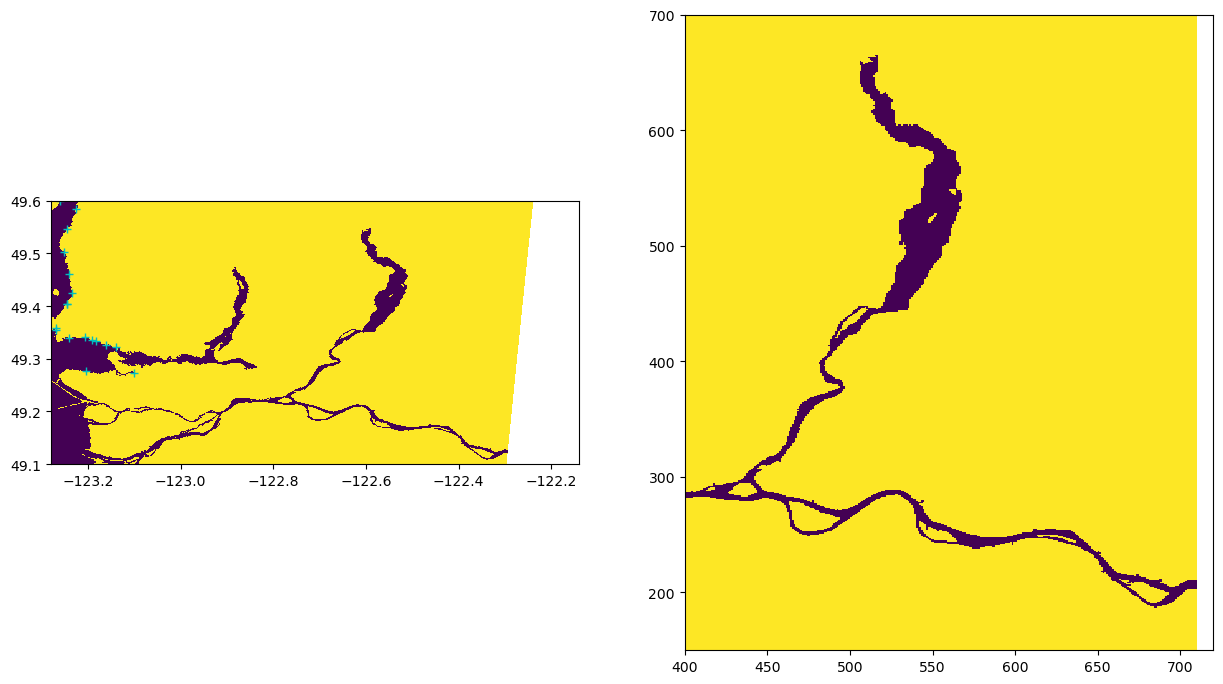

In [421]:
fig, axs = plt.subplots(1, 2, figsize=(15, 9))

axs[0].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[1].pcolormesh(bmask)

plot_newrivers(axs[0], nnav_lon, nnav_lat, with_coords, bynumber=True)

axs[0].set_xlim(-123.28, -122.14)
axs[0].set_ylim(49.1, 49.6)
viz_tools.set_aspect(axs[0], coords='map')

plot_newrivers_index(axs[1], with_coords, bynumber=True)



axs[1].set_xlim(400, 720)
axs[1].set_ylim(150, 700)
axs[1].set_aspect(0.7);

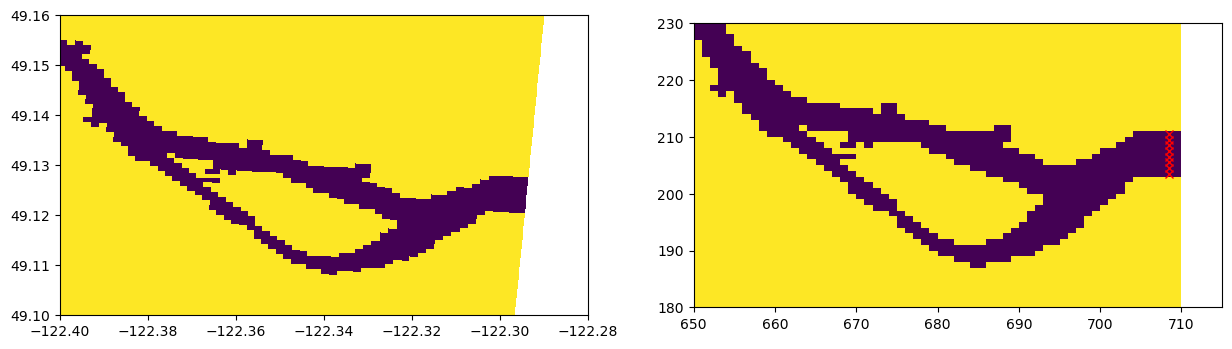

In [438]:
fig, axs = plt.subplots(1, 2, figsize=(15, 9))

axs[0].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[1].pcolormesh(bmask)

plot_newrivers(axs[0], nnav_lon, nnav_lat, with_coords, bynumber=True)

axs[0].set_xlim(-122.4, -122.28)
axs[0].set_ylim(49.1, 49.16)
viz_tools.set_aspect(axs[0], coords='map')

plot_newrivers_index(axs[1], with_coords, bynumber=True)

axs[1].plot(708*np.ones(8)+0.5, np.arange(203, 211)+0.5, 'rx')


axs[1].set_xlim(650, 715)
axs[1].set_ylim(180, 230)
axs[1].set_aspect(0.7);

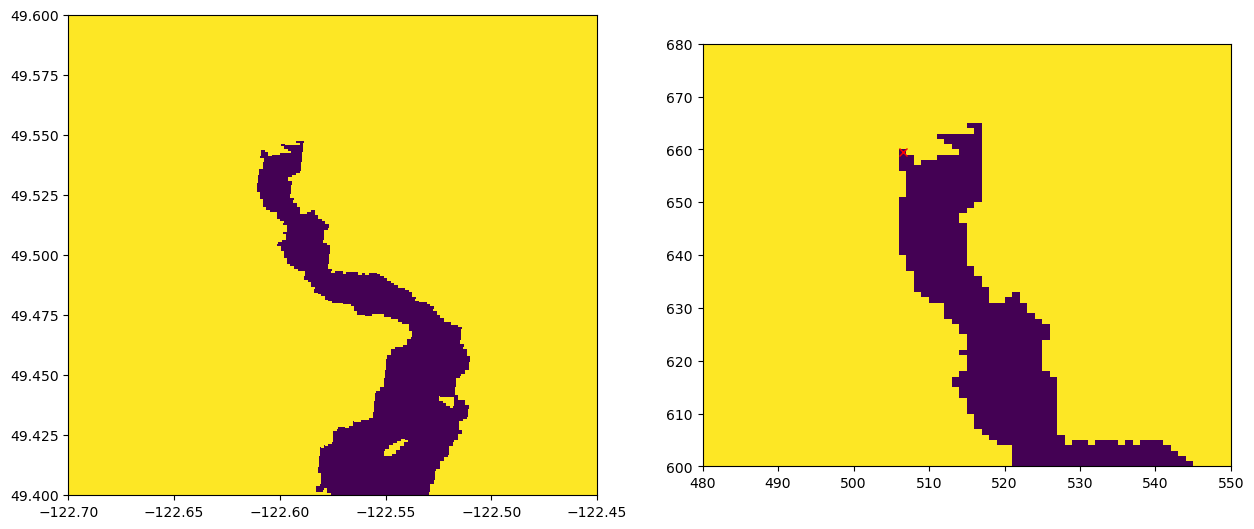

In [443]:
fig, axs = plt.subplots(1, 2, figsize=(15, 9))

axs[0].pcolormesh(nnav_lon, nnav_lat, bmask[:-1, :-1])
axs[1].pcolormesh(bmask)

plot_newrivers(axs[0], nnav_lon, nnav_lat, with_coords, bynumber=True)

axs[0].set_xlim(-122.7, -122.45)
axs[0].set_ylim(49.4, 49.6)
viz_tools.set_aspect(axs[0], coords='map')

plot_newrivers_index(axs[1], with_coords, bynumber=True)

axs[1].plot(506+0.5, 659+0.5, 'rx')


axs[1].set_xlim(480, 550)
axs[1].set_ylim(600, 680)
axs[1].set_aspect(0.7);